# Cedit EDA Case Study

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.max_rows', None)

## Loading the data into dataframe

In [5]:
df = pd.read_csv('application_data.csv')

In [6]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
df.shape

(307511, 122)

## Checking the Data types of the columns

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

## Finding the columns with missing values and calculating percentage of missing values

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [10]:
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

In [11]:
percent_missing

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [12]:
missing_value_df

,column_name,percent_missing
SK_ID_CURR,SK_ID_CURR,0.000000
TARGET,TARGET,0.000000
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,CODE_GENDER,0.000000
FLAG_OWN_CAR,FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,AMT_CREDIT,0.000000
AMT_ANNUITY,AMT_ANNUITY,0.003902


 - **Inferences**  
   - Here we can see most of the columns have more than 45% of missing values. We can drop these columns assuming these will not hold value to our analysis.

In [13]:
# Checking the columns with more than 45% missing values before dropping the columns

df.columns[df.isnull().sum()/len(df) > 0.45]

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [14]:
# Creating dataframe of columns with more than 45% missing values.

columns_to_drop = df.columns[(df.isnull().sum()/len(df))>0.45]

In [15]:
# Dropping the columns with more than 45% missing values.

df = df.drop(columns_to_drop,axis=1)

In [16]:
df.shape

(307511, 73)

In [17]:
df.isnull().sum()/len(df)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000039
AMT_GOODS_PRICE                0.000904
NAME_TYPE_SUITE                0.004201
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


- **Inference**
   - Again we can see here that some of the columns have missing values
   - There are few columns with more than 10% missing values
   - We will keep the columns with less than 10% missing values and analyze the remaining columns.

In [18]:
# Checking the columns with more than 10% missing values.

df.columns[df.isnull().sum()/len(df)>0.10]

Index(['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

 - **Inferences**
     - The Occupation_type column has more than 30% missing values but this is the important variable for our analysis. We cant simply drop this column.
     - The columns like 'EXT_SOURCE_2','EXT_SOURCE_3' and columns from 'AMT_REQ_CREDIT_BUREAU_HOUR' to 'AMT_REQ_CREDIT_BUREAU_YEAR' does not seems to hold any great value for our analysis. So we will drop these columns.

In [19]:
df = df.drop(['EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [20]:
df.shape

(307511, 65)

 - We will analyse OCCUPATION_TYPE column, because it is important for our analysis.

In [21]:
df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [22]:
df.OCCUPATION_TYPE.isnull().sum()

96391

 - Imputing missing values with 'Other' category, because in some cases user might not have provided the occupation details.

In [23]:
df.OCCUPATION_TYPE.fillna('Other',inplace=True)

In [24]:
df.OCCUPATION_TYPE.value_counts()

Other                    96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [25]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_S

In [27]:
df.FLAG_DOCUMENT_2.value_counts()

0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64

In [28]:
df.FLAG_DOCUMENT_3.value_counts()

1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64

In [29]:
df.FLAG_DOCUMENT_4.value_counts()

0    307486
1        25
Name: FLAG_DOCUMENT_4, dtype: int64

In [30]:
df.FLAG_DOCUMENT_5.value_counts()

0    302863
1      4648
Name: FLAG_DOCUMENT_5, dtype: int64

In [31]:
df.FLAG_DOCUMENT_6.value_counts()

0    280433
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64

In [32]:
df.FLAG_DOCUMENT_7.value_counts()

0    307452
1        59
Name: FLAG_DOCUMENT_7, dtype: int64

In [33]:
df.FLAG_DOCUMENT_8.value_counts()

0    282487
1     25024
Name: FLAG_DOCUMENT_8, dtype: int64

In [34]:
df.FLAG_DOCUMENT_9.value_counts()

0    306313
1      1198
Name: FLAG_DOCUMENT_9, dtype: int64

In [35]:
df.FLAG_DOCUMENT_10.value_counts()

0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int64

In [36]:
df.FLAG_DOCUMENT_11.value_counts()

0    306308
1      1203
Name: FLAG_DOCUMENT_11, dtype: int64

In [37]:
df.FLAG_DOCUMENT_12.value_counts()

0    307509
1         2
Name: FLAG_DOCUMENT_12, dtype: int64

In [38]:
df.FLAG_DOCUMENT_13.value_counts()

0    306427
1      1084
Name: FLAG_DOCUMENT_13, dtype: int64

In [39]:
df.FLAG_DOCUMENT_14.value_counts()

0    306608
1       903
Name: FLAG_DOCUMENT_14, dtype: int64

In [40]:
df.FLAG_DOCUMENT_15.value_counts()

0    307139
1       372
Name: FLAG_DOCUMENT_15, dtype: int64

In [41]:
df.FLAG_DOCUMENT_16.value_counts()

0    304458
1      3053
Name: FLAG_DOCUMENT_16, dtype: int64

In [42]:
df.FLAG_DOCUMENT_17.value_counts()

0    307429
1        82
Name: FLAG_DOCUMENT_17, dtype: int64

In [43]:
df.FLAG_DOCUMENT_18.value_counts()

0    305011
1      2500
Name: FLAG_DOCUMENT_18, dtype: int64

In [44]:
df.FLAG_DOCUMENT_19.value_counts()

0    307328
1       183
Name: FLAG_DOCUMENT_19, dtype: int64

In [45]:
df.FLAG_DOCUMENT_20.value_counts()

0    307355
1       156
Name: FLAG_DOCUMENT_20, dtype: int64

In [46]:
df.FLAG_DOCUMENT_21.value_counts()

0    307408
1       103
Name: FLAG_DOCUMENT_21, dtype: int64

 - **Inferences.**
     - We can see that only in 'FLAG_DOCUMENT_3', most of the applicants have submmitted the document. This could be the important variable for our analysis.
     - In all the other cases majority of applicants did not submit the documents.
     - We will drop all the other document columns except for the 'FLAG_DOCUMENT_3' column.

In [47]:
df = df.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
             'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 
             'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 
             'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
             'FLAG_DOCUMENT_21'],axis=1)

In [48]:
df.shape

(307511, 46)

In [49]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_S

In [50]:
df.FLAG_MOBIL.value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

In [51]:
df.FLAG_EMP_PHONE.value_counts()

1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64

- **Inferences**
     - Seems like in most of the cases, applicant has provided the mobile and work phone number. So we can drop this column.

In [52]:
df = df.drop(['FLAG_MOBIL','FLAG_EMP_PHONE'],axis=1)

In [53]:
df.FLAG_WORK_PHONE.value_counts()

0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64

In [54]:
df.FLAG_CONT_MOBILE.value_counts()

1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64

In [55]:
df.FLAG_PHONE.value_counts()

0    221080
1     86431
Name: FLAG_PHONE, dtype: int64

In [56]:
df.FLAG_EMAIL.value_counts()

0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64

 - **Inferences**
     - Seems like in most of the cases the applicant mobile phone was reachable.
     - In most of the cases client did not provide the home phone number, email id.
     - I think it is safe to drop these columns.

In [57]:
df = df.drop(['FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL'],axis=1)

In [58]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3'],
      dtyp

 - **Inferences.** 
  - Also referring to the columns description file, I think the below columns do not add any value to our analysis. 
        So we will drop these.

In [59]:
df = df.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
              'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
              'DEF_60_CNT_SOCIAL_CIRCLE','REGION_POPULATION_RELATIVE'], axis=1)

In [60]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3'],
      dtype='object')

In [61]:
len(df.columns)

33

In [62]:
df.REGION_RATING_CLIENT.value_counts()

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

In [63]:
df.REGION_RATING_CLIENT_W_CITY.value_counts()

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [64]:
df.REG_REGION_NOT_LIVE_REGION.value_counts()

0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [65]:
df.REG_REGION_NOT_WORK_REGION.value_counts()

0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [66]:
df.REG_CITY_NOT_LIVE_CITY.value_counts()

0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [67]:
df.REG_CITY_NOT_WORK_CITY.value_counts()

0    236644
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

In [68]:
df.LIVE_CITY_NOT_WORK_CITY.value_counts()

0    252296
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

In [69]:
df.LIVE_REGION_NOT_WORK_REGION.value_counts()

0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

 - **Inferences.**
      - In this case study, we will only use the clients permenant address and do analysis region wise.
      - So we will drop the columns like LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY.

In [70]:
df = df.drop(['LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'], axis=1)

In [71]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3'],
      dtype='object')

In [72]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,-1134.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,School,-828.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,Government,-815.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,-617.0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,Religion,-1106.0,0


In [73]:
len(df.columns)

29

- **We have only left with 29 columns out of 122 columns. We can drop few more further if needed.**
- **Now that we have dropped the un-neccessary columns we will analyse columns one by one.**
- **We'll check the if the data is in correct format or there are any Null values that are to be fixed.**

In [74]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [75]:
percent_missing

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
REG_REGION_NOT_LIVE_REGION     0.000000


- **For the above columns, seems like there is less number of missing values.So we will keep them as it is or maybe impute or drop them if needed.**

In [76]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,-1134.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,School,-828.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,Government,-815.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,-617.0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,Religion,-1106.0,0


In [77]:
df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [78]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [79]:
df.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [80]:
df.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [81]:
df.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

 - **Inferences.**
     - Seems like there are customers with more than 5 number of childrens. In reality this number is large.
     - We can find the rows with children count more than 5 and drop these or impute these with the mode.

In [82]:
#Finding the rows where children count is greater than 5.
    
rows = df[(df['CNT_CHILDREN']>5)]

In [83]:
rows.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
3079,103596,0,Cash loans,M,N,Y,7,85500.0,411813.0,17577.0,355500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-17676,-1065,-2527.0,-1206,Cleaning staff,9.0,2,2,0,0,Housing,-66.0,1
7204,108386,0,Cash loans,M,N,N,6,157500.0,566055.0,16551.0,472500.0,Unaccompanied,Working,Higher education,Married,House / apartment,-14946,-1493,-8560.0,-4662,High skill tech staff,8.0,2,2,1,0,Business Entity Type 3,-2462.0,1
12615,114709,0,Cash loans,M,Y,N,8,112500.0,755190.0,29947.5,675000.0,Unaccompanied,State servant,Higher education,Married,Municipal apartment,-15197,-6252,-5009.0,-5004,Core staff,10.0,2,2,0,0,School,-1049.0,0
17516,120426,0,Cash loans,M,Y,Y,6,315000.0,696150.0,29623.5,562500.0,Family,Working,Secondary / secondary special,Married,House / apartment,-16376,-2366,-8714.0,-4270,High skill tech staff,8.0,2,2,0,0,Other,-894.0,1
23881,127782,1,Cash loans,F,N,N,9,180000.0,640080.0,31131.0,450000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,Municipal apartment,-10929,-1042,-950.0,-3447,Sales staff,10.0,2,2,0,0,Self-employed,-365.0,1


In [84]:
# finding mode of cnt_children

df['CNT_CHILDREN'].mode()

0    0
dtype: int64

In [85]:
# Inputing those rows with more than 5 number of childrens

df['CNT_CHILDREN'] = df['CNT_CHILDREN'].apply(lambda x: 0 if x>5 else x)

In [86]:
df[(df['CNT_CHILDREN']>5)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3


In [87]:
df.CNT_CHILDREN.value_counts()

0    215413
1     61119
2     26749
3      3717
4       429
5        84
Name: CNT_CHILDREN, dtype: int64

In [88]:
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [89]:
min(df.AMT_INCOME_TOTAL) # checking the minimum value to see if there is any negative value

25650.0

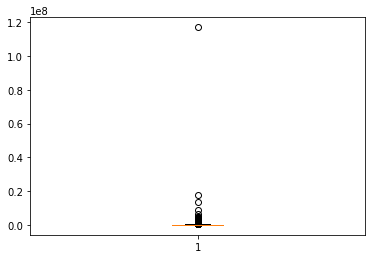

In [90]:
plt.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

In [91]:
df.AMT_INCOME_TOTAL.quantile([0,0.25,0.5,0.75,0.9,0.95,0.975,0.999])

0.000     25650.0
0.250    112500.0
0.500    147150.0
0.750    202500.0
0.900    270000.0
0.950    337500.0
0.975    405000.0
0.999    900000.0
Name: AMT_INCOME_TOTAL, dtype: float64

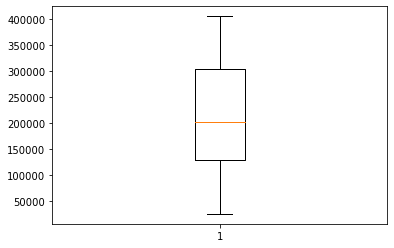

In [92]:
plt.boxplot(df.AMT_INCOME_TOTAL.quantile([0,0.25,0.5,0.75,0.9,0.95,0.975]))
plt.show()

In [93]:
df.drop(df[df['AMT_INCOME_TOTAL'] > 405000].index,inplace=True)

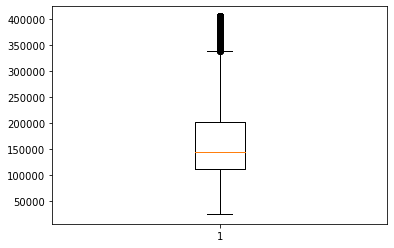

In [94]:
plt.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

 - **Inference.**
     - There were some outliers in the data, we have removed those.
     - These outliers were above 97.5% of the total values.

In [95]:
df.AMT_CREDIT.describe()

count    3.011640e+05
mean     5.892251e+05
std      3.924757e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.084955e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [96]:
df.AMT_CREDIT.quantile([0,0.25,0.5,0.75,0.90,0.95,0.975])

0.000      45000.0
0.250     270000.0
0.500     508495.5
0.750     808650.0
0.900    1125000.0
0.950    1339884.0
0.975    1546020.0
Name: AMT_CREDIT, dtype: float64

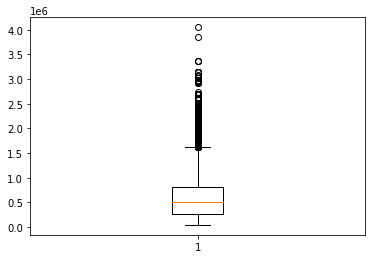

In [97]:
plt.boxplot(df.AMT_CREDIT)
plt.show()

In [98]:
df.drop(df[df['AMT_CREDIT'] > 1125000.0].index,inplace=True)

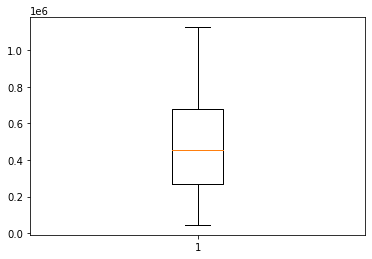

In [99]:
plt.boxplot(df.AMT_CREDIT)
plt.show()

- **Inference.**
     - There were some outliers in the data, we have removed those.
     - These outliers were above 97.5% of the total values.

In [100]:
df.AMT_ANNUITY.describe()

count    272070.000000
mean      24450.354978
std       11957.335765
min        1615.500000
25%       15696.000000
50%       23107.500000
75%       30798.000000
max      112410.000000
Name: AMT_ANNUITY, dtype: float64

In [101]:
df.AMT_ANNUITY.quantile([0,0.25,0.5,0.75,0.90,0.95,0.975])

0.000     1615.5
0.250    15696.0
0.500    23107.5
0.750    30798.0
0.900    39987.0
0.950    46741.5
0.975    52753.5
Name: AMT_ANNUITY, dtype: float64

In [102]:
df.drop(df[df['AMT_ANNUITY'] > 55540].index,inplace=True)

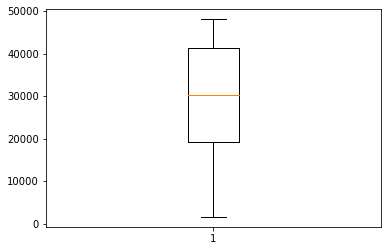

In [103]:
plt.boxplot(df.AMT_ANNUITY.quantile([0,0.25,0.5,0.75,0.90,0.95,0.975]))
plt.show()

- **Inference.**
     - There were some outliers in the data, we have removed those.
     - These outliers were above 97.5% of the total values.

In [104]:
df.AMT_GOODS_PRICE.describe()

count    2.669400e+05
mean     4.396748e+05
std      2.477894e+05
min      4.050000e+04
25%      2.250000e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.350000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [105]:
df.AMT_GOODS_PRICE.quantile([0,0.25,0.5,0.75,0.90,0.95,0.975])

0.000     40500.0
0.250    225000.0
0.500    450000.0
0.750    675000.0
0.900    810000.0
0.950    900000.0
0.975    936000.0
Name: AMT_GOODS_PRICE, dtype: float64

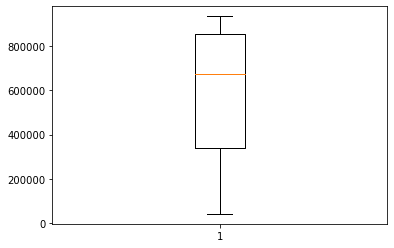

In [106]:
plt.boxplot(df.AMT_GOODS_PRICE.quantile([0,0.25,0.5,0.75,0.90,0.95,0.975]))
plt.show()

In [107]:
df.drop(df[df['AMT_GOODS_PRICE'] > 1206000].index,inplace=True)

- **Inference.**
     - There were some outliers in the data, we have removed those.
     - These outliers were above 97.5% of the total values.

In [108]:
df.NAME_TYPE_SUITE.describe()

count            266122
unique                7
top       Unaccompanied
freq             216354
Name: NAME_TYPE_SUITE, dtype: object

In [109]:
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      216354
Family              34627
Spouse, partner      9647
Children             2902
Other_B              1588
Other_A               766
Group of people       238
Name: NAME_TYPE_SUITE, dtype: int64

In [110]:
df = df.drop('NAME_TYPE_SUITE',axis=1)

 - We think that who was accompanyinng the applicant while applying for the loan will not affect much to our analysis.
 - So we will drop this column.


In [111]:
df.NAME_INCOME_TYPE.describe()

count      267209
unique          8
top       Working
freq       141006
Name: NAME_INCOME_TYPE, dtype: object

In [112]:
df.NAME_INCOME_TYPE.value_counts()

Working                 141006
Commercial associate     58000
Pensioner                50269
State servant            17895
Unemployed                  18
Student                     15
Maternity leave              3
Businessman                  3
Name: NAME_INCOME_TYPE, dtype: int64

 - **Inferences.**
     - Seems like there is an incorrect entry in this column.
     - Maternity leave is not the type of income of the employee. So we will drop these records as there are only 5 records of it.

In [113]:
df[df['NAME_INCOME_TYPE'] == 'Maternity leave']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
109612,227123,0,Revolving loans,F,N,Y,2,135000.0,810000.0,40500.0,810000.0,Maternity leave,Higher education,Married,House / apartment,-14943,-1223,-8853.0,-3868,Core staff,4.0,2,2,0,0,Self-employed,-20.0,0
291432,437628,1,Cash loans,F,Y,Y,2,49500.0,423000.0,11286.0,423000.0,Maternity leave,Secondary / secondary special,Married,House / apartment,-14363,-3020,-419.0,-4333,Core staff,4.0,2,2,0,0,Police,-2227.0,0
295458,442305,0,Revolving loans,F,N,Y,1,90000.0,315000.0,15750.0,315000.0,Maternity leave,Higher education,Married,House / apartment,-9519,-1550,-4266.0,-768,Accountants,3.0,2,2,0,0,Bank,-666.0,0


In [114]:
df.drop(df[df['NAME_INCOME_TYPE'] == 'Maternity leave'].index,inplace=True) 

In [115]:
df[df['NAME_INCOME_TYPE'] == 'Maternity leave']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3


In [116]:
df.NAME_INCOME_TYPE.value_counts()

Working                 141006
Commercial associate     58000
Pensioner                50269
State servant            17895
Unemployed                  18
Student                     15
Businessman                  3
Name: NAME_INCOME_TYPE, dtype: int64

In [117]:
df.NAME_EDUCATION_TYPE.describe()

count                            267206
unique                                5
top       Secondary / secondary special
freq                             195386
Name: NAME_EDUCATION_TYPE, dtype: object

In [118]:
df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    195386
Higher education                  59152
Incomplete higher                  8942
Lower secondary                    3610
Academic degree                     116
Name: NAME_EDUCATION_TYPE, dtype: int64

In [119]:
df.NAME_FAMILY_STATUS.describe()

count      267206
unique          6
top       Married
freq       165560
Name: NAME_FAMILY_STATUS, dtype: object

In [120]:
df.NAME_FAMILY_STATUS.value_counts()

Married                 165560
Single / not married     41647
Civil marriage           27030
Separated                17845
Widow                    15123
Unknown                      1
Name: NAME_FAMILY_STATUS, dtype: int64

In [121]:
df.NAME_HOUSING_TYPE.describe()

count                267206
unique                    6
top       House / apartment
freq                 236259
Name: NAME_HOUSING_TYPE, dtype: object

In [122]:
df.NAME_HOUSING_TYPE.value_counts()

House / apartment      236259
With parents            13621
Municipal apartment      9720
Rented apartment         4406
Office apartment         2222
Co-op apartment           978
Name: NAME_HOUSING_TYPE, dtype: int64

In [123]:
df.DAYS_BIRTH.describe()

count    267206.000000
mean     -15995.657291
std        4441.849320
min      -25201.000000
25%      -19729.000000
50%      -15664.000000
75%      -12253.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

 - **Age can't be negative, so we will convet this into positive values.**

In [124]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: abs(x))

In [125]:
df.DAYS_BIRTH.head(10)

0      9461
2     19046
3     19005
4     19932
5     16941
8     20099
9     14469
10    10197
11    20417
12    13439
Name: DAYS_BIRTH, dtype: int64

In [126]:
df.DAYS_BIRTH.describe()

count    267206.000000
mean      15995.657291
std        4441.849320
min        7489.000000
25%       12253.000000
50%       15664.000000
75%       19729.000000
max       25201.000000
Name: DAYS_BIRTH, dtype: float64

 - **We can convert the age from days to years, We will add new column named 'AGE' in dataframe and drop the 'DAYS-BIRTH' column.**

In [127]:
df['AGE'] = df.DAYS_BIRTH.apply(lambda x: int(x/365))

In [128]:
df.AGE.value_counts()

27    7791
38    7566
37    7448
39    7437
31    7401
36    7345
40    7312
28    7223
41    7138
32    6968
43    6963
30    6955
29    6935
42    6924
33    6768
35    6709
34    6613
44    6487
54    6397
53    6330
46    6110
45    5932
48    5851
47    5840
56    5825
57    5794
59    5741
52    5709
51    5663
55    5600
49    5581
50    5474
60    5453
58    5424
62    4904
61    4810
63    4590
64    4550
26    4179
25    3880
23    3856
24    3677
65    3019
22    2802
66    2080
67    2041
21    1233
68     862
69      15
20       1
Name: AGE, dtype: int64

 - **Age is a discrete variable. We can bin these values in the groups of 10.**

In [129]:
df.AGE = pd.cut(df.AGE,bins=[0,10,20,30,40,50,60,70])

In [130]:
df.AGE.value_counts(ascending=False)

(30, 40]    71567
(40, 50]    62300
(50, 60]    57936
(20, 30]    48531
(60, 70]    26871
(10, 20]        1
(0, 10]         0
Name: AGE, dtype: int64

 - **Dropping the DAYS_BIRTH column as it is not needed.**

In [131]:
df = df.drop('DAYS_BIRTH',axis=1)

In [132]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AGE'],
      dtype='object')

In [133]:
df.AGE.head()

0    (20, 30]
2    (50, 60]
3    (50, 60]
4    (50, 60]
5    (40, 50]
Name: AGE, dtype: category
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [134]:
df.DAYS_EMPLOYED.describe()

count    267206.000000
mean      66831.536586
std      143677.211292
min      -17912.000000
25%       -2664.000000
50%       -1156.000000
75%        -258.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [135]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: abs(x))

In [136]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: int(x/365))

In [137]:
df['YEARS_EMPLOYED'].value_counts()

1000    50277
1       28257
2       26190
0       24776
3       21892
4       18803
5       13889
6       12816
7       11117
8        9625
9        7473
10       6123
11       4876
12       4394
14       3876
13       3573
15       2210
16       1925
17       1626
19       1536
18       1511
20       1336
21       1184
22       1033
23        840
24        766
25        701
27        562
26        549
28        513
29        472
30        386
31        356
34        304
32        282
33        278
35        209
36        161
37        115
39        101
38         96
41         52
40         46
42         34
44         26
43         18
45         12
48          4
46          3
49          1
47          1
Name: YEARS_EMPLOYED, dtype: int64

 - **Inferences**
     - Here we can see that large number of employees has worked for 1000 years. In real life scenario this is not possible.
     - We also cant replace these values because the number is very large.
     - We prefer to drop this column because it will lead to wrong analysis.

In [138]:
df = df.drop('DAYS_EMPLOYED',axis=1)

In [139]:
df = df.drop('YEARS_EMPLOYED',axis=1)

 - **Also we dont need DAYS_REGISTRATION column as it will not add much value to our analysis, So we will drop this column.**

In [140]:
df = df.drop('DAYS_REGISTRATION',axis=1)

In [141]:
df.DAYS_ID_PUBLISH.describe()

count    267206.000000
mean      -2993.703925
std        1506.213903
min       -7197.000000
25%       -4296.000000
50%       -3251.000000
75%       -1722.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [142]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: abs(x))

In [143]:
df.DAYS_ID_PUBLISH = pd.cut(df.DAYS_ID_PUBLISH,bins=[10,20,30,40,50,100,200,500,1000,2000,3000,4000,5000,6000,7000])

In [144]:
df.DAYS_ID_PUBLISH.value_counts(ascending=False)

(4000, 5000]    87522
(3000, 4000]    46434
(2000, 3000]    44100
(1000, 2000]    40732
(500, 1000]     19712
(200, 500]      10739
(5000, 6000]    10384
(100, 200]       3205
(50, 100]        1784
(10, 20]          521
(20, 30]          421
(6000, 7000]      369
(40, 50]          355
(30, 40]          354
Name: DAYS_ID_PUBLISH, dtype: int64

 - **We binned the values of 'DAYS_ID_PUBLISH' column in ranges so that it will be easy for our analysis.**

In [145]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AGE'],
      dtype='object')

In [146]:
len(df.columns)

26

In [147]:
df.CNT_FAM_MEMBERS.describe()

count    267205.000000
mean          2.135428
std           0.915712
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [148]:
df.CNT_FAM_MEMBERS.value_counts()

2.0     135053
1.0      62317
3.0      45231
4.0      21201
5.0       2964
6.0        334
7.0         67
8.0         20
9.0          5
10.0         3
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
14.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [149]:
df.CNT_FAM_MEMBERS.isnull().sum()

1

In [150]:
df['CNT_FAM_MEMBERS'].mode()

0    2.0
dtype: float64

 - **Inferences**
     - As we can see there are only teo missing values, we can impute these with the mode of count. 
     - Also we will convet these into integer values. 

In [151]:
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].fillna(2.0)

In [152]:
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype('int64')

In [153]:
df.CNT_FAM_MEMBERS.isnull().sum()

0

In [154]:
df.CNT_FAM_MEMBERS.value_counts()

2     135054
1      62317
3      45231
4      21201
5       2964
6        334
7         67
8         20
9          5
10         3
16         2
12         2
20         2
11         1
13         1
14         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [155]:
df.REGION_RATING_CLIENT.describe()

count    267206.000000
mean          2.074433
std           0.492517
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64

In [156]:
df.REGION_RATING_CLIENT.value_counts()

2    200909
3     43093
1     23204
Name: REGION_RATING_CLIENT, dtype: int64

In [157]:
df.REGION_RATING_CLIENT_W_CITY.describe()

count    267206.000000
mean          2.054939
std           0.486718
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

In [158]:
df.REGION_RATING_CLIENT_W_CITY.value_counts()

2    203100
3     39393
1     24713
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [159]:
len(df.columns)

26

In [160]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AGE'],
      dtype='object')

In [161]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,"(2000, 3000]",Laborers,1,2,2,0,0,Business Entity Type 3,-1134.0,1,"(20, 30]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,"(2000, 3000]",Laborers,1,2,2,0,0,Government,-815.0,0,"(50, 60]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(2000, 3000]",Laborers,2,2,2,0,0,Business Entity Type 3,-617.0,1,"(50, 60]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,"(3000, 4000]",Core staff,1,2,2,0,0,Religion,-1106.0,0,"(50, 60]"
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,"(200, 500]",Laborers,2,2,2,0,0,Other,-2536.0,1,"(40, 50]"


In [162]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: abs(x))

In [163]:
df['DAYS_LAST_PHONE_CHANGE'].describe()

count    267205.000000
mean        949.445186
std         820.311169
min           0.000000
25%         267.000000
50%         741.000000
75%        1555.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [164]:
df.DAYS_LAST_PHONE_CHANGE = pd.cut(df.DAYS_LAST_PHONE_CHANGE,bins=[10,20,30,40,50,100,200,500,1000,2000,3000,4000,5000])

In [165]:
df.DAYS_LAST_PHONE_CHANGE.value_counts()

(1000, 2000]    77280
(500, 1000]     55325
(200, 500]      43876
(2000, 3000]    28712
(100, 200]       9467
(3000, 4000]     3726
(50, 100]        2900
(10, 20]         1348
(20, 30]          980
(30, 40]          736
(40, 50]          634
(4000, 5000]       25
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

- **We binned the values of 'DAYS_LAST_PHONE_CHANGE' column in ranges so that it will be easy for our analysis.**

In [166]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,"(2000, 3000]",Laborers,1,2,2,0,0,Business Entity Type 3,"(1000, 2000]",1,"(20, 30]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,"(2000, 3000]",Laborers,1,2,2,0,0,Government,"(500, 1000]",0,"(50, 60]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(2000, 3000]",Laborers,2,2,2,0,0,Business Entity Type 3,"(500, 1000]",1,"(50, 60]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,"(3000, 4000]",Core staff,1,2,2,0,0,Religion,"(1000, 2000]",0,"(50, 60]"
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,"(200, 500]",Laborers,2,2,2,0,0,Other,"(2000, 3000]",1,"(40, 50]"


 - **Inferences**
 
     - We have gone through each and every column and removed the un-neccessary columns.
     - We've imputed the missing values if needed.
     - We have binned few of the columns in required ranges.
     - We will now do the univariate analysis on the remaining columns.

In [167]:
df2 = pd.read_csv('previous_application.csv')

In [168]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
df2.shape

(1670214, 37)

In [170]:
df2.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

 - **Checking the missing value percentage.**

In [171]:
round(100*df2.isnull().sum()/len(df2),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [172]:
df2.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [173]:
df2.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

 - **Dropping the un-neccessary values.**

In [174]:
df2= df2.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
            'NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED',
            'NAME_CASH_LOAN_PURPOSE','DAYS_DECISION','NAME_PAYMENT_TYPE', 
            'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
            'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP',
           'PRODUCT_COMBINATION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
           'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
           'NFLAG_INSURED_ON_APPROVAL'],axis=1)

In [175]:
df2.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'CNT_PAYMENT'], dtype=object)

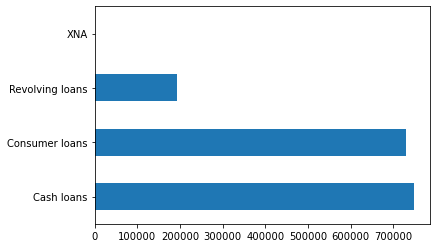

In [176]:
df2.NAME_CONTRACT_TYPE.value_counts().plot.barh()
plt.show()

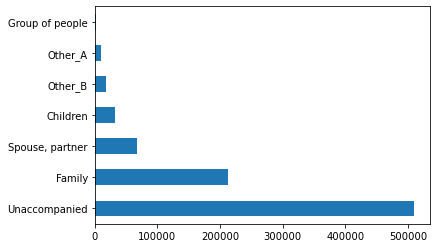

In [177]:
df2.NAME_TYPE_SUITE.value_counts().plot.barh()
plt.show()

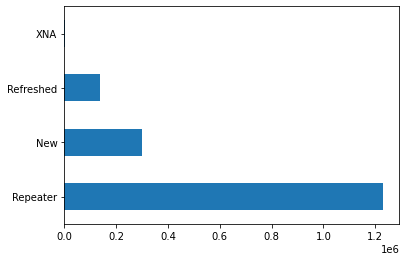

In [178]:
df2.NAME_CLIENT_TYPE.value_counts().plot.barh()
plt.show()

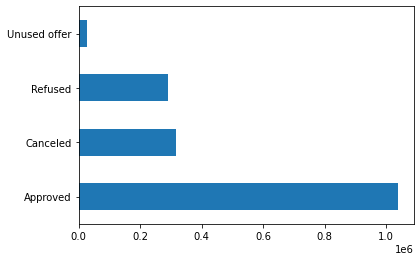

In [179]:
df2.NAME_CONTRACT_STATUS.value_counts().plot.barh()
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### Let's merge the two dataframes

In [180]:
new_df = df.merge(df2, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [181]:
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,CNT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,"(2000, 3000]",Laborers,1,2,2,0,0,Business Entity Type 3,"(1000, 2000]",1,"(20, 30]",1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,Approved,NaN,New,24.0
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,"(2000, 3000]",Laborers,1,2,2,0,0,Government,"(500, 1000]",0,"(50, 60]",1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,Approved,Unaccompanied,New,4.0
2,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(2000, 3000]",Laborers,2,2,2,0,0,Business Entity Type 3,"(500, 1000]",1,"(50, 60]",2078043,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,Approved,Unaccompanied,Repeater,48.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(2000, 3000]",Laborers,2,2,2,0,0,Business Entity Type 3,"(500, 1000]",1,"(50, 60]",2827850,Revolving loans,NaN,0.0,0.0,NaN,NaN,Canceled,NaN,Repeater,NaN
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(2000, 3000]",Laborers,2,2,2,0,0,Business Entity Type 3,"(500, 1000]",1,"(50, 60]",2190416,Consumer loans,29027.520,334917.0,267930.0,66987.0,334917.0,Approved,Family,Repeater,12.0


In [182]:
new_df.shape

(1237390, 37)

-------------------------------------------------------------------------------------------------------------------------------

## Univariate Analysis

-------------------------------------------------------------------------------------------------------------------------------

 - **To perform the univariate analysis we have to divide the dataframe into two, based on the target variable.**

In [183]:
df_1 = new_df[new_df['TARGET']==1]

# for defaulters

In [184]:
df_0 = new_df[new_df['TARGET']==0]

# for non-defaulters

In [185]:
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,CNT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,"(2000, 3000]",Laborers,1,2,2,0,0,Business Entity Type 3,"(1000, 2000]",1,"(20, 30]",1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,Approved,NaN,New,24.0
142,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(4000, 5000]",Sales staff,2,3,3,0,0,Self-employed,"(1000, 2000]",1,"(30, 40]",1514918,Consumer loans,5791.725,33250.5,41251.5,0.0,33250.5,Approved,Children,Repeater,10.0
143,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(4000, 5000]",Sales staff,2,3,3,0,0,Self-employed,"(1000, 2000]",1,"(30, 40]",1560053,Consumer loans,4543.110,41305.5,40855.5,4131.0,41305.5,Approved,Family,New,12.0
144,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(4000, 5000]",Sales staff,2,3,3,0,0,Self-employed,"(1000, 2000]",1,"(30, 40]",1232720,Consumer loans,6103.305,35955.0,30339.0,9000.0,35955.0,Approved,Unaccompanied,Repeater,6.0
145,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(4000, 5000]",Sales staff,2,3,3,0,0,Self-employed,"(1000, 2000]",1,"(30, 40]",1182112,Cash loans,7801.155,67500.0,76131.0,NaN,67500.0,Approved,NaN,Repeater,12.0


In [186]:
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,CNT_PAYMENT
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,"(2000, 3000]",Laborers,1,2,2,0,0,Government,"(500, 1000]",0,"(50, 60]",1564014,Consumer loans,5357.25,24282.0,20106.0,4860.0,24282.0,Approved,Unaccompanied,New,4.0
2,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(2000, 3000]",Laborers,2,2,2,0,0,Business Entity Type 3,"(500, 1000]",1,"(50, 60]",2078043,Cash loans,24246.00,675000.0,675000.0,NaN,675000.0,Approved,Unaccompanied,Repeater,48.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(2000, 3000]",Laborers,2,2,2,0,0,Business Entity Type 3,"(500, 1000]",1,"(50, 60]",2827850,Revolving loans,NaN,0.0,0.0,NaN,NaN,Canceled,NaN,Repeater,NaN
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(2000, 3000]",Laborers,2,2,2,0,0,Business Entity Type 3,"(500, 1000]",1,"(50, 60]",2190416,Consumer loans,29027.52,334917.0,267930.0,66987.0,334917.0,Approved,Family,Repeater,12.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,"(2000, 3000]",Laborers,2,2,2,0,0,Business Entity Type 3,"(500, 1000]",1,"(50, 60]",1489396,Revolving loans,13500.00,270000.0,270000.0,NaN,270000.0,Approved,Unaccompanied,Repeater,0.0


In [187]:
df_0.shape

(1126842, 37)

In [188]:
len(df_0) / len(df)

4.217128357896155

In [189]:
len(df_1) / len(df)

0.4137182548296071

In [190]:
df_1.shape

(110548, 37)

 - **Inferences.**
     - As we can see the dataset is imbalanced.
     - We can take samples from df_0 to balance the dataset.

In [191]:
df_0 = df_0.sample(n=110548, random_state = 1)

In [192]:
df_0.shape

(110548, 37)

   - We took same number of random samples from df_0, this will make our dataset balanced.
   - The ratio now of defaulters to non-defaulters is equal.

###  Categorical Univariate Analysis.

In [193]:
df_0.NAME_CONTRACT_TYPE_y.value_counts()

Consumer loans     49263
Cash loans         48689
Revolving loans    12583
XNA                   13
Name: NAME_CONTRACT_TYPE_y, dtype: int64

In [194]:
df_1.NAME_CONTRACT_TYPE_y.value_counts()

Cash loans         51444
Consumer loans     43550
Revolving loans    15494
XNA                   60
Name: NAME_CONTRACT_TYPE_y, dtype: int64

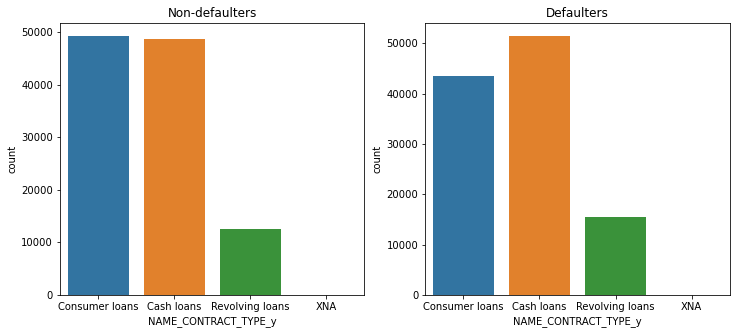

In [195]:
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='NAME_CONTRACT_TYPE_y', data=df_0)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='NAME_CONTRACT_TYPE_y', data=df_1)
plt.show()

 - **Inferences**
     - As we can see the people who takes cash loans tends to default more.

In [196]:
new_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AGE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y',
       'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'CNT_PAYMENT'],
      dtype='object')

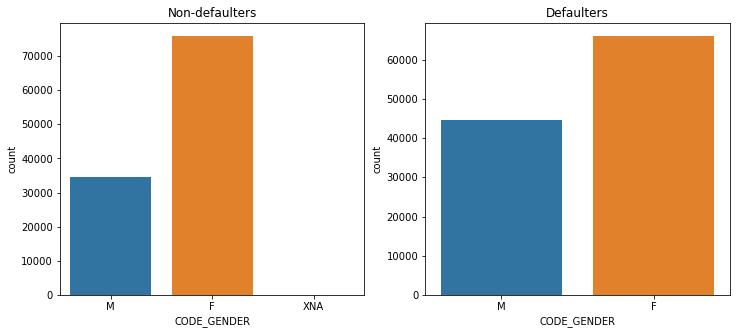

In [197]:
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='CODE_GENDER', data=df_0)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='CODE_GENDER', data=df_1)
plt.show()

In [198]:
df_0.CODE_GENDER.value_counts()

F      75893
M      34649
XNA        6
Name: CODE_GENDER, dtype: int64

In [199]:
df_1.CODE_GENDER.value_counts()

F    66041
M    44507
Name: CODE_GENDER, dtype: int64

 - **Inferences**
     - As we can see from the plot and the values that Males tend to default more than females.

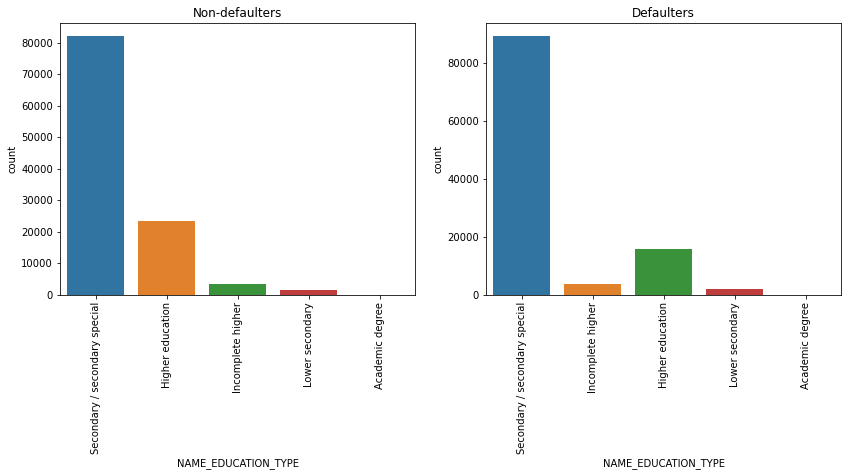

In [200]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='NAME_EDUCATION_TYPE', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='NAME_EDUCATION_TYPE', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [201]:
df_0.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    82146
Higher education                 23425
Incomplete higher                 3522
Lower secondary                   1414
Academic degree                     41
Name: NAME_EDUCATION_TYPE, dtype: int64

In [202]:
df_1.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    89259
Higher education                 15783
Incomplete higher                 3714
Lower secondary                   1786
Academic degree                      6
Name: NAME_EDUCATION_TYPE, dtype: int64

 - **Inferences.**
     - Education is the very important factor in our analysis.
     - People with Secondary / Secondary Special education level have higher default rate followed by people with incomplete higher and lower secondary education.

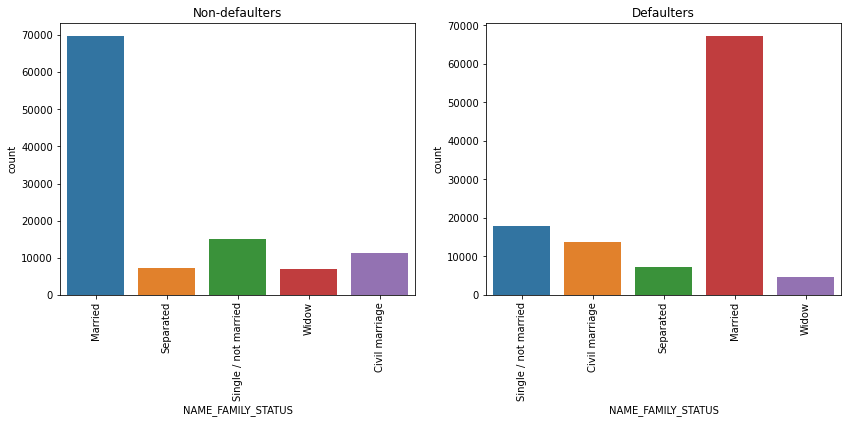

In [203]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='NAME_FAMILY_STATUS', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='NAME_FAMILY_STATUS', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [204]:
df_0.NAME_FAMILY_STATUS.value_counts()

Married                 69797
Single / not married    15102
Civil marriage          11310
Separated                7307
Widow                    7032
Name: NAME_FAMILY_STATUS, dtype: int64

In [205]:
df_1.NAME_FAMILY_STATUS.value_counts()

Married                 67269
Single / not married    17764
Civil marriage          13791
Separated                7101
Widow                    4623
Name: NAME_FAMILY_STATUS, dtype: int64

 - **Inferences.**
     - By looking at the values, we can say that people with Single / not married status have slightly higher default rate than others.
     - Also the default rate us high in Civil married people.
     - Widows have highest non-default rate than everyone.

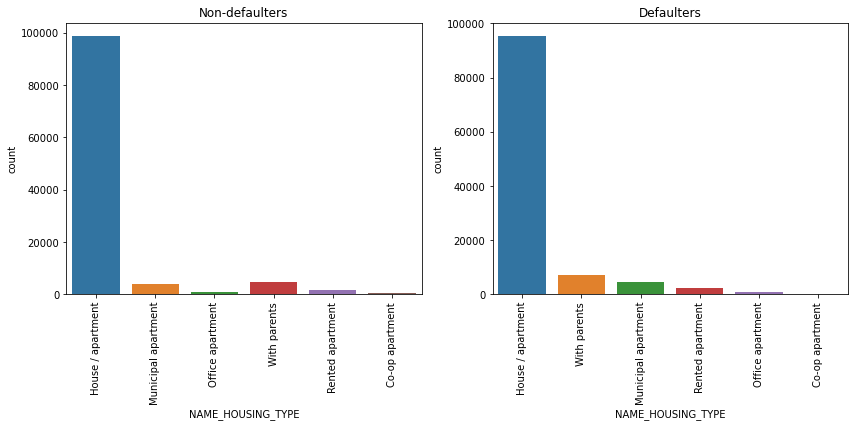

In [206]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='NAME_HOUSING_TYPE', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='NAME_HOUSING_TYPE', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [207]:
df_0.NAME_HOUSING_TYPE.value_counts()

House / apartment      98871
With parents            4923
Municipal apartment     4033
Rented apartment        1545
Office apartment         825
Co-op apartment          351
Name: NAME_HOUSING_TYPE, dtype: int64

In [208]:
df_1.NAME_HOUSING_TYPE.value_counts()

House / apartment      95502
With parents            7221
Municipal apartment     4429
Rented apartment        2322
Office apartment         747
Co-op apartment          327
Name: NAME_HOUSING_TYPE, dtype: int64

 - **Inferences.**
     - By looking ata the graph and the values we can say that people living with parents have highest default rate.
     - People living in municipal apartment are second highest defaulters followed by people who rent the property. 

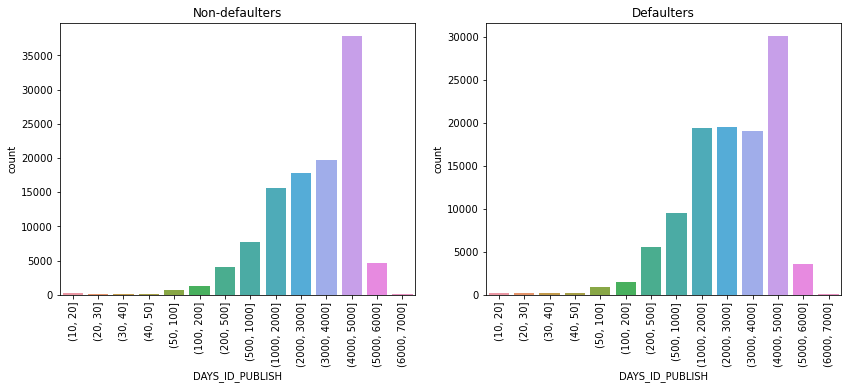

In [209]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='DAYS_ID_PUBLISH', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='DAYS_ID_PUBLISH', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [210]:
df_0.DAYS_ID_PUBLISH.value_counts()

(4000, 5000]    37844
(3000, 4000]    19689
(2000, 3000]    17823
(1000, 2000]    15652
(500, 1000]      7678
(5000, 6000]     4675
(200, 500]       4143
(100, 200]       1288
(50, 100]         684
(10, 20]          215
(20, 30]          184
(40, 50]          154
(6000, 7000]      140
(30, 40]          134
Name: DAYS_ID_PUBLISH, dtype: int64

In [211]:
df_1.DAYS_ID_PUBLISH.value_counts()

(4000, 5000]    30069
(2000, 3000]    19560
(1000, 2000]    19363
(3000, 4000]    19045
(500, 1000]      9512
(200, 500]       5616
(5000, 6000]     3558
(100, 200]       1511
(50, 100]         903
(40, 50]          275
(10, 20]          266
(20, 30]          232
(30, 40]          226
(6000, 7000]       93
Name: DAYS_ID_PUBLISH, dtype: int64

 - **Inferences.**
     - Looking at the graph and values we can say that people who changed the identity document with which he/she applied for the loan within 1000-4000 days tends to default more.

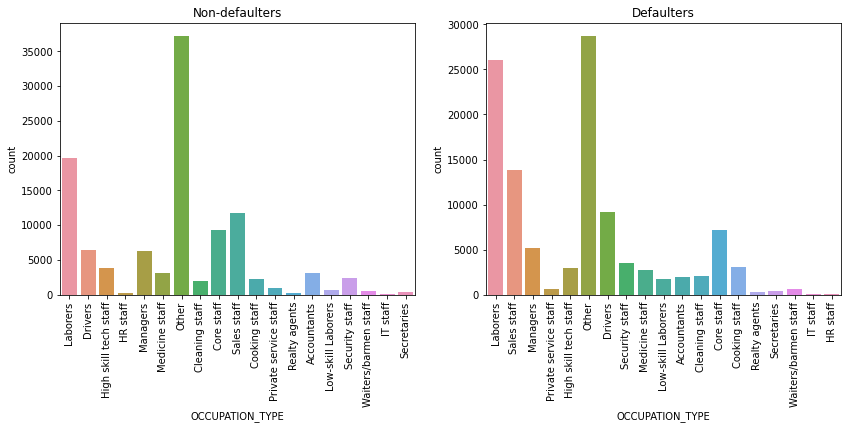

In [212]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='OCCUPATION_TYPE', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='OCCUPATION_TYPE', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [213]:
df_0.OCCUPATION_TYPE.value_counts()

Other                    37213
Laborers                 19646
Sales staff              11824
Core staff                9337
Drivers                   6385
Managers                  6257
High skill tech staff     3808
Medicine staff            3170
Accountants               3082
Security staff            2453
Cooking staff             2246
Cleaning staff            1961
Private service staff      940
Low-skill Laborers         682
Waiters/barmen staff       493
Secretaries                464
Realty agents              269
HR staff                   210
IT staff                   108
Name: OCCUPATION_TYPE, dtype: int64

In [214]:
df_1.OCCUPATION_TYPE.value_counts()

Other                    28715
Laborers                 26071
Sales staff              13862
Drivers                   9214
Core staff                7189
Managers                  5208
Security staff            3472
Cooking staff             3035
High skill tech staff     2982
Medicine staff            2717
Cleaning staff            2115
Accountants               2012
Low-skill Laborers        1722
Private service staff      666
Waiters/barmen staff       606
Secretaries                389
Realty agents              320
HR staff                   140
IT staff                   113
Name: OCCUPATION_TYPE, dtype: int64

 - **Inferences.**
     - Now we can clearly see that people with Laborers occupation have the highest default rate as compared to other types of occupation.
     - Sales staff are the second highest people with higher default rate.
     - If we observe carefully, we can see that people with Driver and Low-Skill Laborers occupation have higher rate of default too.

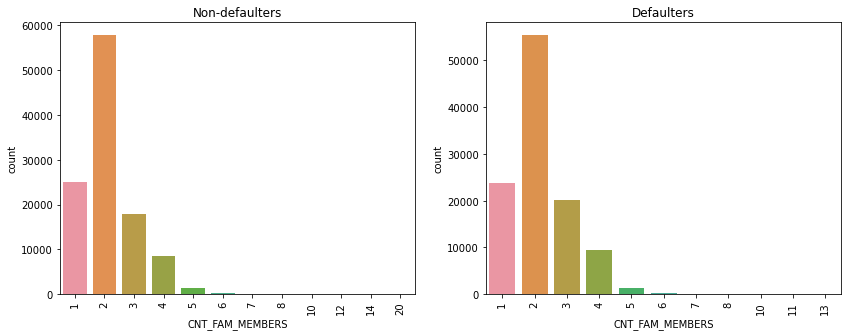

In [215]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='CNT_FAM_MEMBERS', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='CNT_FAM_MEMBERS', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [216]:
df_0.CNT_CHILDREN.value_counts()

0    79208
1    20708
2     9092
3     1362
4      155
5       23
Name: CNT_CHILDREN, dtype: int64

In [217]:
df_1.CNT_CHILDREN.value_counts()

0    74723
1    23632
2    10392
3     1518
4      245
5       38
Name: CNT_CHILDREN, dtype: int64

 - **Inferences.**
     - People with 1 number of childrens seems to have slightly higher default rate followed by people with 3 to 5 number of childrens.
     - People who dont have the child have high non-default rate. 

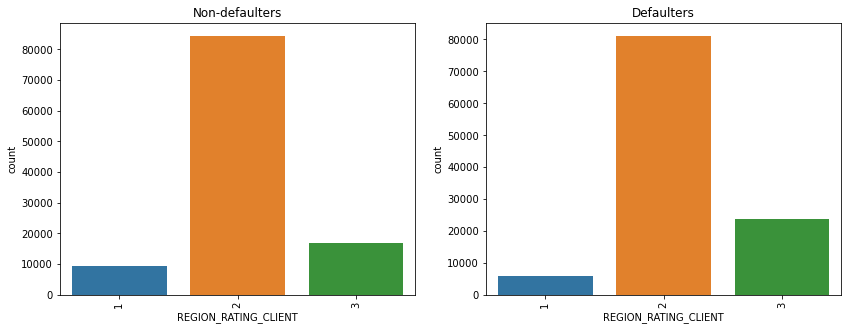

In [218]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='REGION_RATING_CLIENT', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='REGION_RATING_CLIENT', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [219]:
df_0.REGION_RATING_CLIENT.value_counts()

2    84469
3    16917
1     9162
Name: REGION_RATING_CLIENT, dtype: int64

In [220]:
df_1.REGION_RATING_CLIENT.value_counts()

2    81196
3    23650
1     5702
Name: REGION_RATING_CLIENT, dtype: int64

 - **Inferences.**
     - People who lives in region 3 have highest default rate. 
     - People who lives in region 1 have highest non-default rate. 

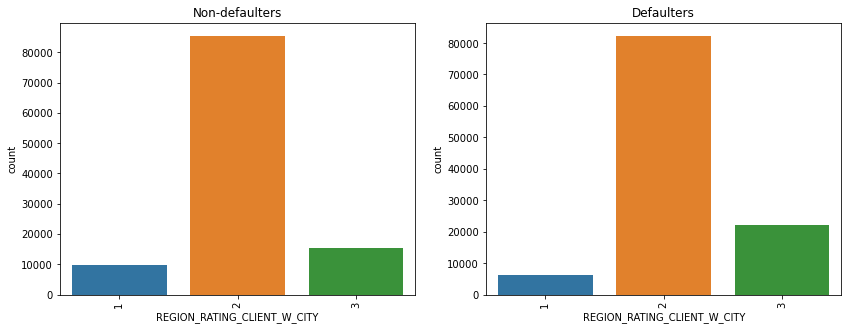

In [221]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='REGION_RATING_CLIENT_W_CITY', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='REGION_RATING_CLIENT_W_CITY', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [222]:
df_0.REGION_RATING_CLIENT_W_CITY.value_counts()

2    85489
3    15270
1     9789
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [223]:
df_1.REGION_RATING_CLIENT_W_CITY.value_counts()

2    82352
3    22108
1     6088
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

 - **Inferences.**
     - If we look at the graph then we can see that people who lives in region 3 seems to have higher default rate .
     - But people who lives in region 1 seems to have lower default rate.

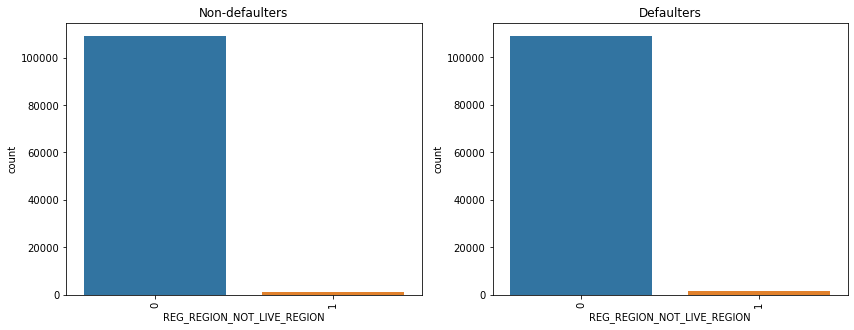

In [224]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='REG_REGION_NOT_LIVE_REGION', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='REG_REGION_NOT_LIVE_REGION', data=df_1)
plt.xticks(rotation=90)
plt.show()

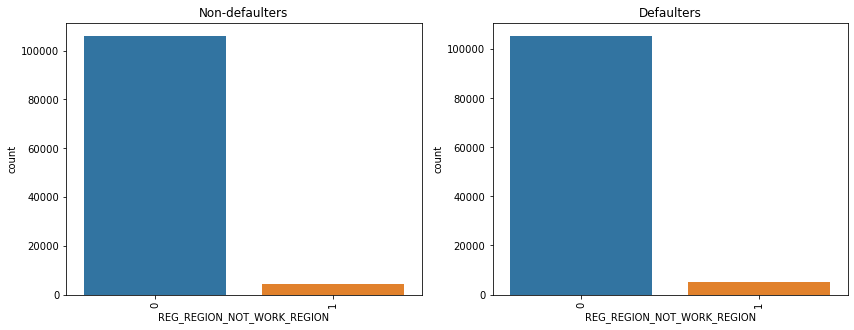

In [225]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='REG_REGION_NOT_WORK_REGION', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='REG_REGION_NOT_WORK_REGION', data=df_1)
plt.xticks(rotation=90)
plt.show()

 - **Inferences.**
     - If we look at the graph then there is no significance difference between defaulters and non-defaulters.
     - We can simply drop these columns as it will not add any value to our analysis.

In [226]:
df_0 = df_0.drop(['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION'],axis=1)

In [227]:
df_1 = df_1.drop(['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION'],axis=1)

In [228]:
df_0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AGE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y',
       'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'CNT_PAYMENT'],
      dtype='object')

In [229]:
df_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AGE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y',
       'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'CNT_PAYMENT'],
      dtype='object')

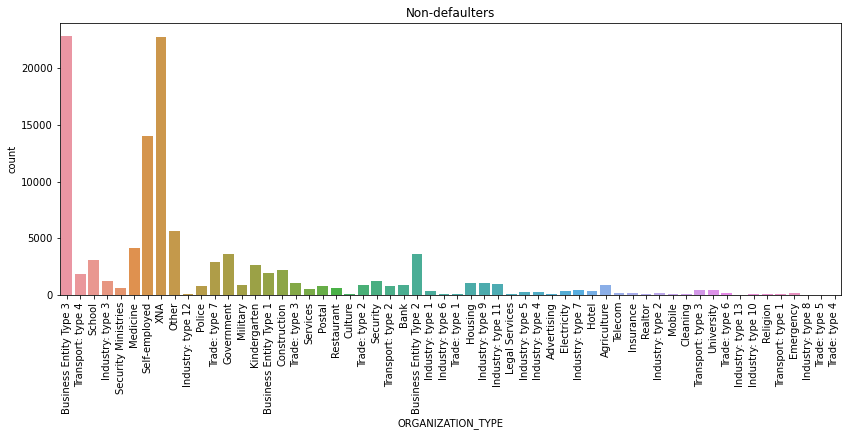

In [230]:
plt.figure(figsize=[14,5])
plt.title('Non-defaulters')
sns.countplot(x='ORGANIZATION_TYPE', data=df_0)
plt.xticks(rotation=90)
plt.show()

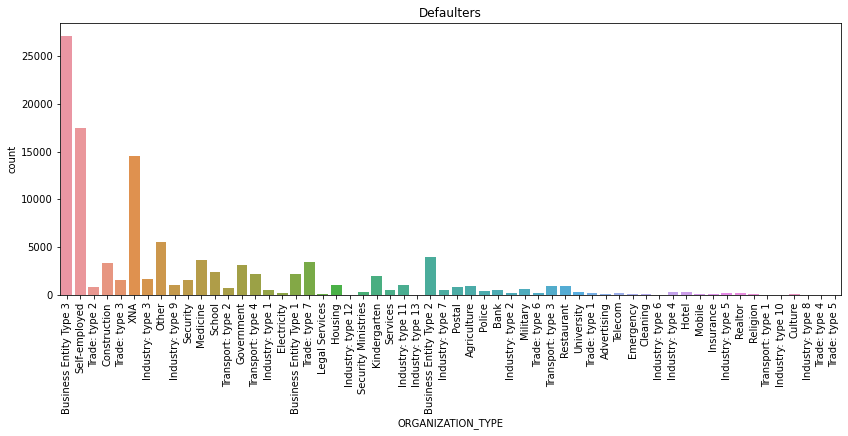

In [231]:
plt.figure(figsize=[14,5])
plt.title('Defaulters')
sns.countplot(x='ORGANIZATION_TYPE', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [232]:
df_0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    22851
XNA                       22772
Self-employed             14046
Other                      5628
Medicine                   4152
Government                 3635
Business Entity Type 2     3599
School                     3122
Trade: type 7              2869
Kindergarten               2623
Construction               2184
Business Entity Type 1     1966
Transport: type 4          1884
Security                   1222
Industry: type 3           1217
Industry: type 9           1094
Housing                    1081
Trade: type 3              1073
Industry: type 11           964
Trade: type 2               894
Bank                        879
Military                    876
Agriculture                 865
Postal                      808
Transport: type 2           780
Police                      759
Security Ministries         616
Restaurant                  603
Services                    561
Industry: type 7            465
University                  459
Transpor

In [233]:
df_1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    27079
Self-employed             17505
XNA                       14537
Other                      5513
Business Entity Type 2     4012
Medicine                   3633
Trade: type 7              3408
Construction               3382
Government                 3113
School                     2372
Transport: type 4          2169
Business Entity Type 1     2164
Kindergarten               2013
Industry: type 3           1651
Security                   1521
Trade: type 3              1509
Industry: type 11          1067
Housing                    1050
Industry: type 9           1043
Agriculture                 965
Restaurant                  964
Transport: type 3           913
Trade: type 2               819
Postal                      808
Transport: type 2           739
Military                    568
Industry: type 7            544
Bank                        543
Industry: type 1            535
Services                    477
Police                      457
Security

 - **Inferences.**
     - By looking at the graph and values, it looks like people with occupation type 'Business Entity Type 3' tends to default more.
     - Self-employed people have the second highest default rate.

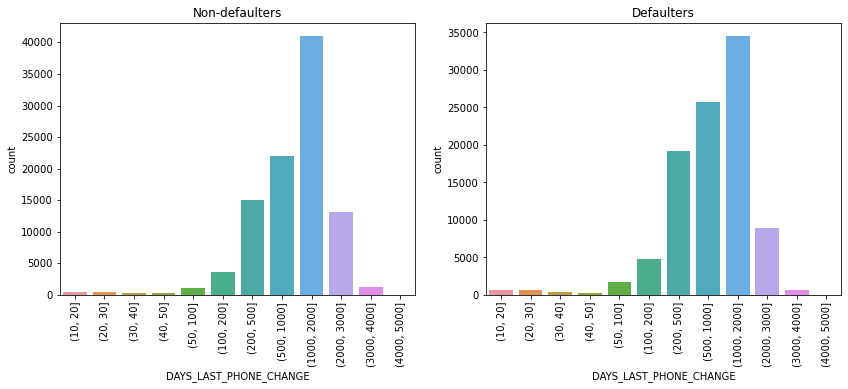

In [234]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='DAYS_LAST_PHONE_CHANGE', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='DAYS_LAST_PHONE_CHANGE', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [235]:
df_0.DAYS_LAST_PHONE_CHANGE.value_counts()

(1000, 2000]    41006
(500, 1000]     21965
(200, 500]      15084
(2000, 3000]    13181
(100, 200]       3594
(3000, 4000]     1210
(50, 100]        1152
(10, 20]          512
(20, 30]          416
(30, 40]          310
(40, 50]          282
(4000, 5000]        7
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

In [236]:
df_1.DAYS_LAST_PHONE_CHANGE.value_counts()

(1000, 2000]    34515
(500, 1000]     25676
(200, 500]      19192
(2000, 3000]     8955
(100, 200]       4776
(50, 100]        1745
(3000, 4000]      690
(10, 20]          682
(20, 30]          632
(30, 40]          378
(40, 50]          305
(4000, 5000]        0
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

 - **Inferences.**
     - By looking at the graph, we can say that people who changed their phone numbers within 200-1000 days have higher number of default if we compare it with non-defaulters.

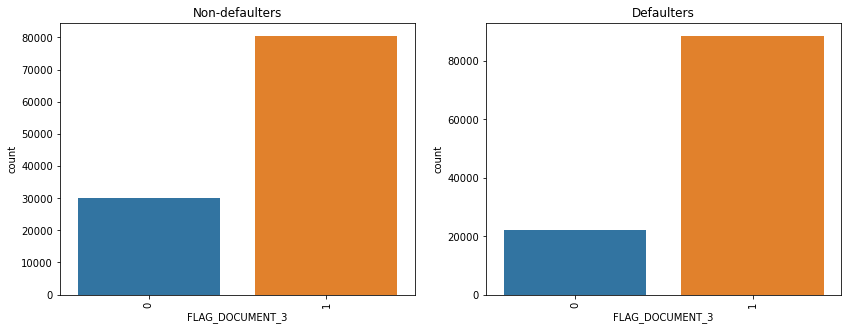

In [237]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='FLAG_DOCUMENT_3', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='FLAG_DOCUMENT_3', data=df_1)
plt.xticks(rotation=90)
plt.show()

 - **Inferences.**
     - As we can see, there is no significanct difference between defaultrs and non-defaluter. 
     - Also this will not add any value to our analysis. So we will drop this column.

In [238]:
df_0 = df_0.drop('FLAG_DOCUMENT_3',axis=1)

In [239]:
df_1 = df_1.drop('FLAG_DOCUMENT_3',axis=1)

In [240]:
df_0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'CNT_PAYMENT'],
      dtype='object')

In [241]:
df_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'CNT_PAYMENT'],
      dtype='object')

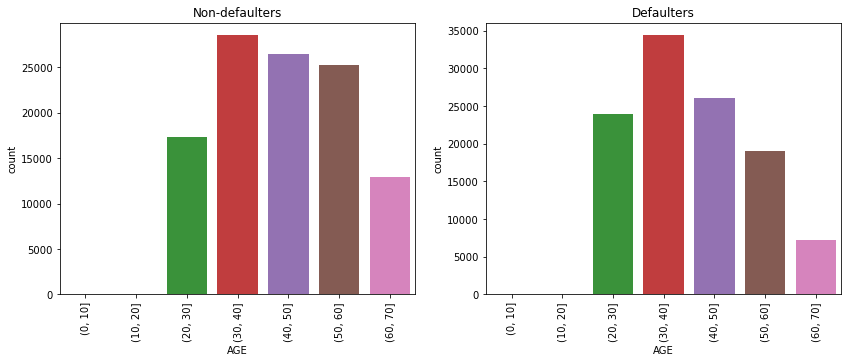

In [242]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='AGE', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='AGE', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [243]:
df_0.AGE.value_counts()

(30, 40]    28524
(40, 50]    26451
(50, 60]    25249
(20, 30]    17386
(60, 70]    12938
(10, 20]        0
(0, 10]         0
Name: AGE, dtype: int64

In [244]:
df_1.AGE.value_counts()

(30, 40]    34378
(40, 50]    26064
(20, 30]    23893
(50, 60]    18975
(60, 70]     7238
(10, 20]        0
(0, 10]         0
Name: AGE, dtype: int64

 - **Inferences.**
     - If we look at the graph and the values, we can say that people between 20-30 & 30-40 age group range have higher defalut rate.
     - People between 60-70 age group range have lowest defalut rate

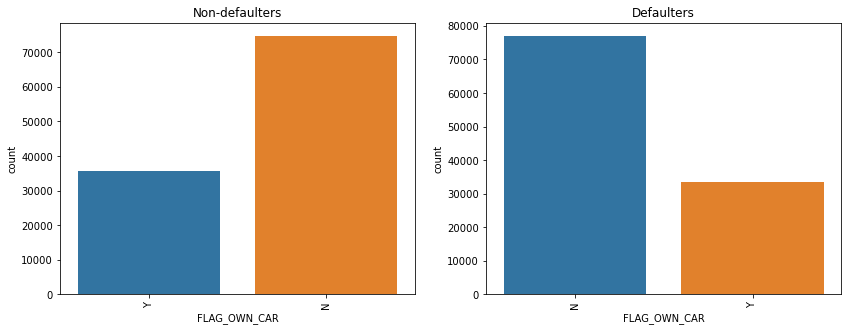

In [245]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='FLAG_OWN_CAR', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='FLAG_OWN_CAR', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [246]:
df_0.FLAG_OWN_CAR.value_counts()

N    74769
Y    35779
Name: FLAG_OWN_CAR, dtype: int64

In [247]:
df_1.FLAG_OWN_CAR.value_counts()  

N    77107
Y    33441
Name: FLAG_OWN_CAR, dtype: int64

 - **Inferences.**
     - There is no big difference in people owning car who default and non-default.

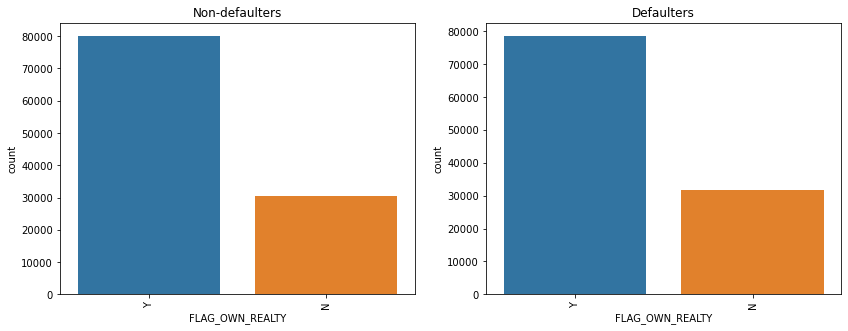

In [248]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
plt.title('Non-defaulters')
sns.countplot(x='FLAG_OWN_REALTY', data=df_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='FLAG_OWN_REALTY', data=df_1)
plt.xticks(rotation=90)
plt.show()

In [249]:
df_0.FLAG_OWN_REALTY.value_counts()

Y    80179
N    30369
Name: FLAG_OWN_REALTY, dtype: int64

In [250]:
df_1.FLAG_OWN_REALTY.value_counts()

Y    78676
N    31872
Name: FLAG_OWN_REALTY, dtype: int64

 - **Inferences.**
     - There is no big difference in people owning reality who default and non-default.

In [251]:
df_0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'CNT_PAYMENT'],
      dtype='object')

In [252]:
len(df_0.columns)

34

In [253]:
df_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'CNT_PAYMENT'],
      dtype='object')

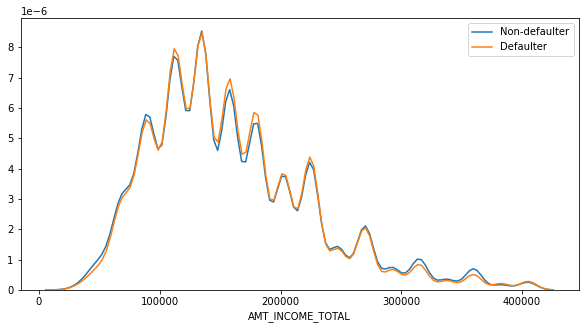

In [254]:
plt.figure(figsize=[10,5])
sns.distplot(df_0.AMT_INCOME_TOTAL,hist=False,label='Non-defaulter')
sns.distplot(df_1.AMT_INCOME_TOTAL,hist=False,label='Defaulter')
plt.show()

 - **Inferences.** 
     - We can see that there is no significance difference between the income of defaulters and non-defaulters.

In [255]:
df_0.AMT_CREDIT_x.quantile([0,0.25,0.5,0.75,0.9,0.95,0.975,0.999])

0.000      45000.0
0.250     260640.0
0.500     450000.0
0.750     675000.0
0.900     900000.0
0.950    1018899.0
0.975    1078200.0
0.999    1125000.0
Name: AMT_CREDIT_x, dtype: float64

In [256]:
df_1.AMT_CREDIT_x.quantile([0,0.25,0.5,0.75,0.9,0.95,0.975,0.999])

0.000      45000.000
0.250     276277.500
0.500     450000.000
0.750     640080.000
0.900     862560.000
0.950     993676.275
0.975    1067940.000
0.999    1125000.000
Name: AMT_CREDIT_x, dtype: float64

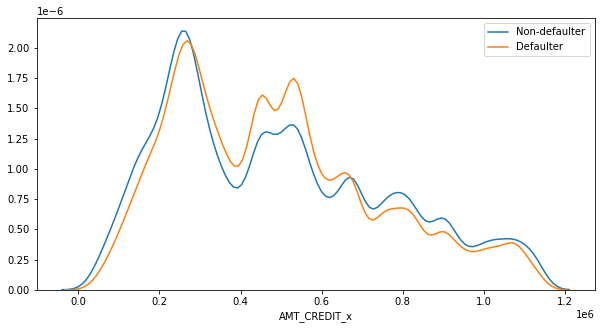

In [257]:
plt.figure(figsize=[10,5])
sns.distplot(df_0.AMT_CREDIT_x,hist=False,label='Non-defaulter')
sns.distplot(df_1.AMT_CREDIT_x,hist=False,label='Defaulter')
plt.show()

 - **Inferences**
     - It looks like, the loan credit amount of the defaulters is higher than that of non-defaulters which may result in delay of loan repayment.

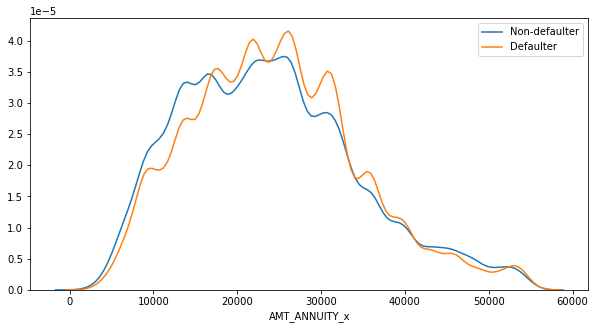

In [258]:
plt.figure(figsize=[10,5])
sns.distplot(df_0.AMT_ANNUITY_x,hist=False,label='Non-defaulter')
sns.distplot(df_1.AMT_ANNUITY_x,hist=False,label='Defaulter')
plt.show()

In [259]:
df_0.AMT_ANNUITY_x.quantile([0,0.25,0.5,0.75,0.9,0.95,0.975,0.999])

0.000     1615.5000
0.250    15750.0000
0.500    22972.5000
0.750    30451.5000
0.900    38331.0000
0.950    44199.0000
0.975    47974.5000
0.999    54496.6965
Name: AMT_ANNUITY_x, dtype: float64

In [260]:
df_1.AMT_ANNUITY_x.quantile([0,0.25,0.5,0.75,0.9,0.95,0.975,0.999])

0.000     2722.5
0.250    17095.5
0.500    24003.0
0.750    31000.5
0.900    37854.0
0.950    43191.0
0.975    47749.5
0.999    54436.5
Name: AMT_ANNUITY_x, dtype: float64

- **Inferences**
     - It looks like loan annuity ammount of is slightly higher than non-defaulters which may lead to delay in laon repayment.

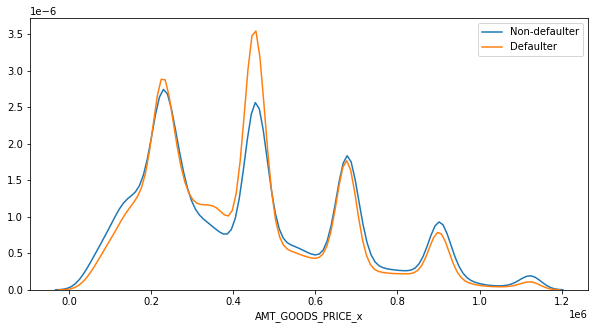

In [261]:
plt.figure(figsize=[10,5])
sns.distplot(df_0.AMT_GOODS_PRICE_x,hist=False,label='Non-defaulter')
sns.distplot(df_1.AMT_GOODS_PRICE_x,hist=False,label='Defaulter')
plt.show()

In [262]:
df_0.AMT_GOODS_PRICE_x.quantile([0,0.25,0.5,0.75,0.9,0.95,0.975,0.999])

0.000      45000.0
0.250     225000.0
0.500     450000.0
0.750     666000.0
0.900     814500.0
0.950     900000.0
0.975     945000.0
0.999    1125000.0
Name: AMT_GOODS_PRICE_x, dtype: float64

In [263]:
df_1.AMT_GOODS_PRICE_x.quantile([0,0.25,0.5,0.75,0.9,0.95,0.975,0.999])

0.000      45000.0
0.250     229500.0
0.500     436500.0
0.750     553500.0
0.900     720000.0
0.950     900000.0
0.975     904500.0
0.999    1125000.0
Name: AMT_GOODS_PRICE_x, dtype: float64

- **Inferences**
     - It looks like, the goods price amount above 75% of the quantile range for defaulters is higher than that of non-defaulters.
     - This means higher the good price higher the chances of defaulting.

-------------------------------------------------------------------------------------------------------------------------------

## Bivariate Analysis

-------------------------------------------------------------------------------------------------------------------------------

In [264]:
df_0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'CNT_PAYMENT'],
      dtype='object')

In [265]:
df_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'CNT_PAYMENT'],
      dtype='object')

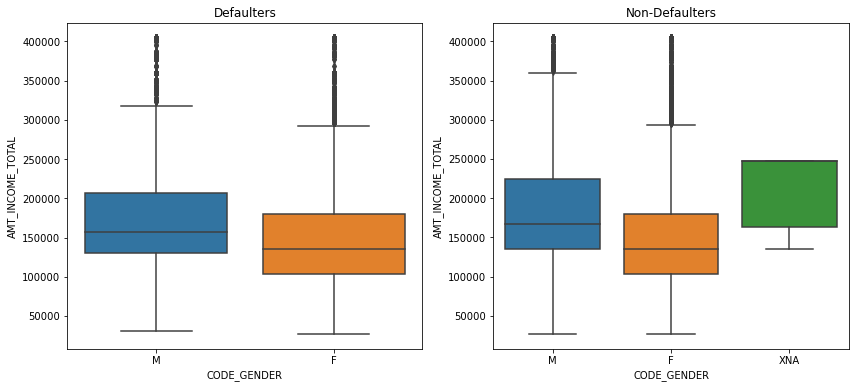

In [266]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='CODE_GENDER',y='AMT_INCOME_TOTAL',data=df_1)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.boxplot(x='CODE_GENDER',y='AMT_INCOME_TOTAL',data=df_0)
plt.show()

 - **inferences**
     - It looks like annual income range of defaulters in male is narrower than that of income range of non-defaulters.
     - This means salary have some impact on the defaulting rate in males. 
     - Median salary of both male and female defaulters/non-defaulters is also almost same.

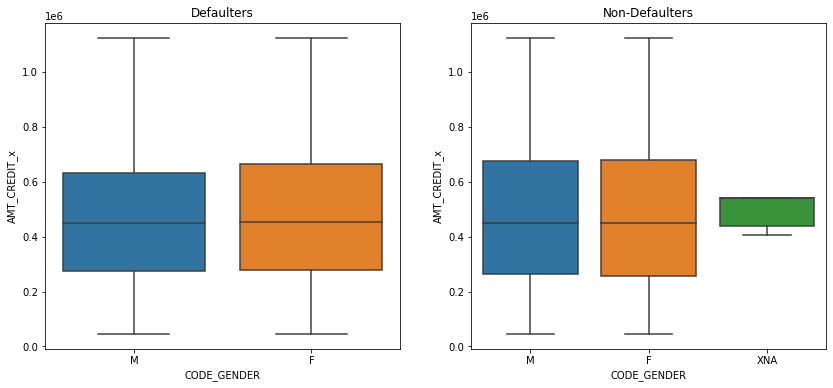

In [267]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='CODE_GENDER',y='AMT_CREDIT_x',data=df_1)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.boxplot(x='CODE_GENDER',y='AMT_CREDIT_x',data=df_0)
plt.show()

 - **inferences**
     - It looks like credit ammount of defaulters in males have slightly narrow range than that of non-defaulters.
     - Whereas in non-defaulters, this range is wider.
     - Median values are also almost same in both defaulter/non-defaulter.

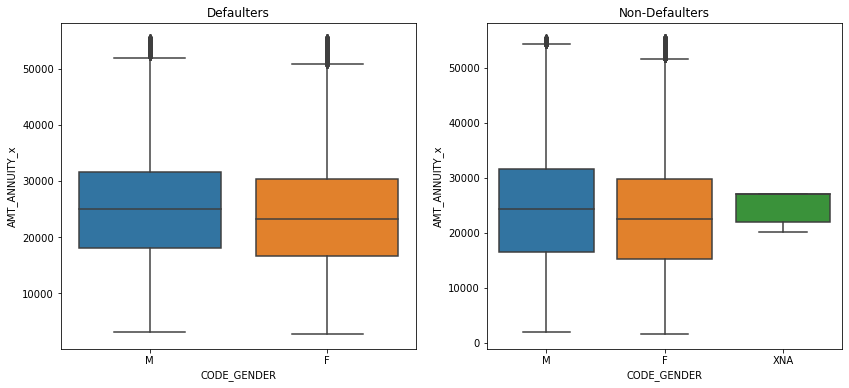

In [268]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='CODE_GENDER',y='AMT_ANNUITY_x',data=df_1)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.boxplot(x='CODE_GENDER',y='AMT_ANNUITY_x',data=df_0)
plt.show()

 - **inferences**
     - It looks like there is no significant difference both defaulters and non-defaulters.
     - We can't make any inferences from this graph.

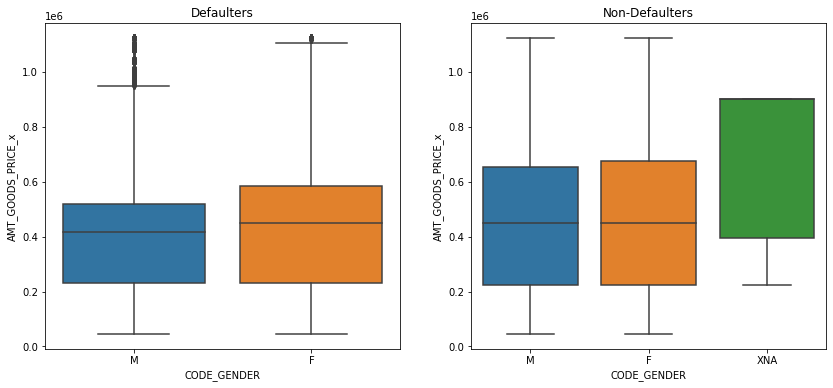

In [269]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Defaulters')
sns.boxplot(x='CODE_GENDER',y='AMT_GOODS_PRICE_x',data=df_1)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.boxplot(x='CODE_GENDER',y='AMT_GOODS_PRICE_x',data=df_0)
plt.show()

 - **inferences**
     - The ammount taken for goods have slightly lower range for males and females in defaulters.
     - The median is almost equal in both cases.
     - Again its hard to make any inferences from this data.

In [270]:
df_0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'CNT_PAYMENT'],
      dtype='object')

In [271]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    sns.countplot(x=col, hue=hue, data=df_0, ax = ax1)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Non-defaulters in terms of percentage')

    ax2 = plt.subplot(222)
    sns.countplot(x=col, hue=hue, data=df_1, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Defaulters in terms of percentage')



    fig.tight_layout()

    plt.show()

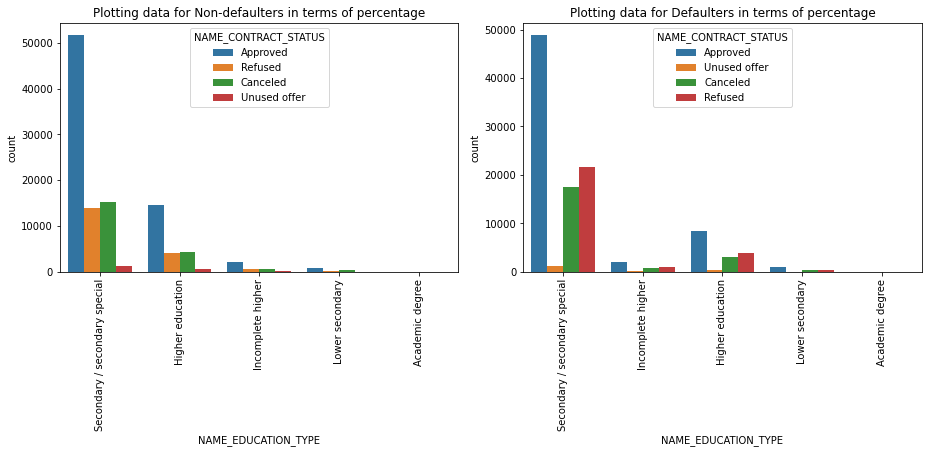

In [272]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

 - **Inferences.**
     - We can clearly see that Refusal rate in people with Secondary / Secondary special education is higher than that of others.

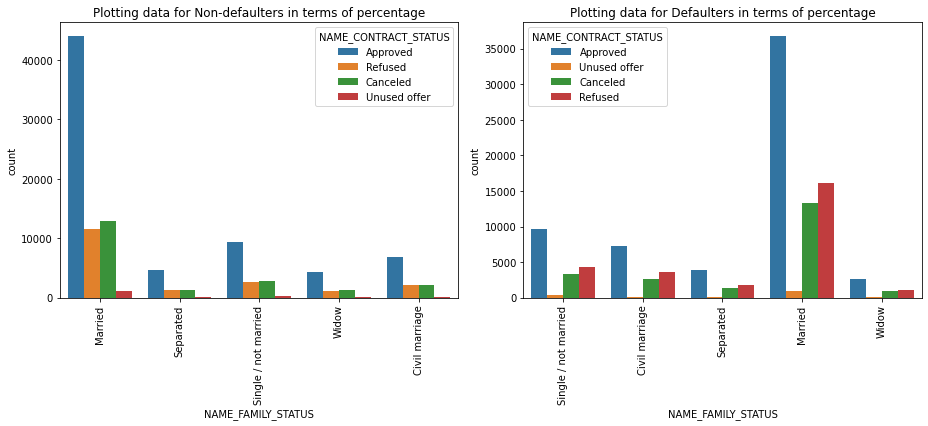

In [273]:
plotting('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')  

 - **Inferences.**
     - We can clearly see that Refusal rate in people who are married is higher than that of people with other marital status.

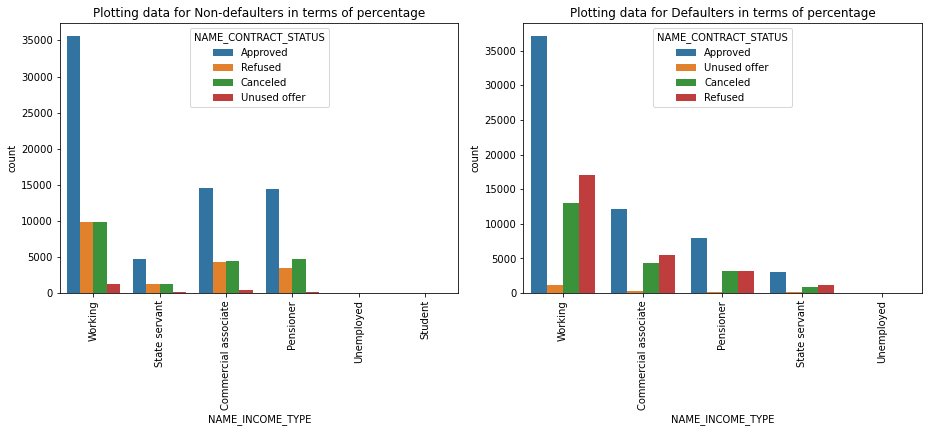

In [274]:
plotting('NAME_INCOME_TYPE','NAME_CONTRACT_STATUS') 

 - **Inferences.**
     - We can clearly see that Refusal rate in people who are working is higher than that of other categories.

In [275]:
df_0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'CNT_PAYMENT'],
      dtype='object')

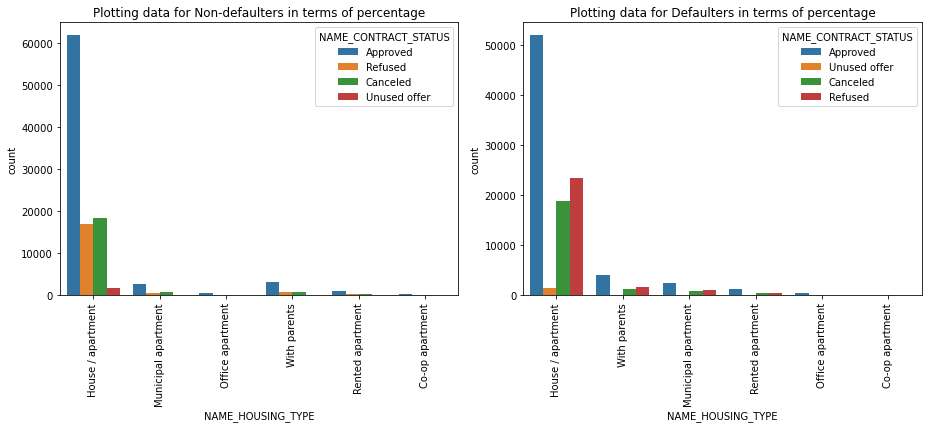

In [276]:
plotting('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS') 

 - **Inferences.**
     - We can clearly see that Refusal rate in people who own a House/Apartment is higher than that of others.

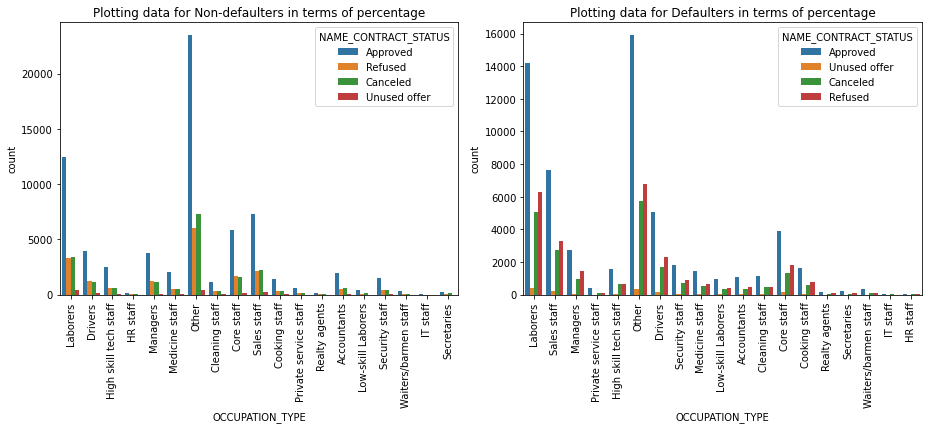

In [277]:
plotting('OCCUPATION_TYPE','NAME_CONTRACT_STATUS')

 - **Inferences.**
     - As we can see that based on the previous data, laborers, Sales staff and drivers people have high refusal rate than others.

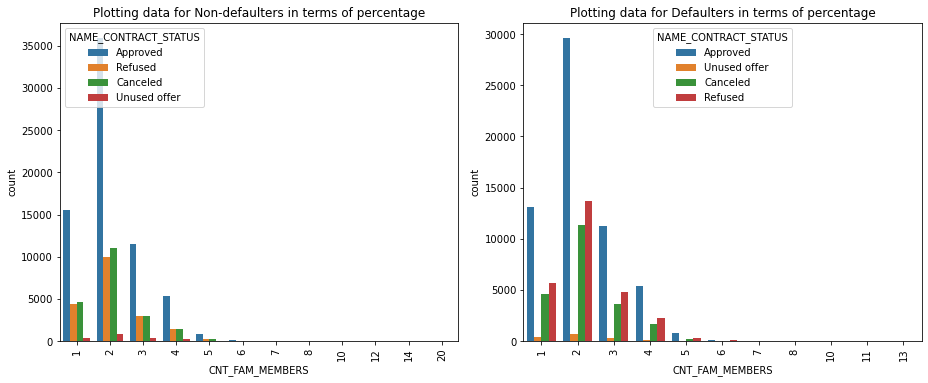

In [278]:
plotting('CNT_FAM_MEMBERS','NAME_CONTRACT_STATUS')

 - **Inferences.**
     - We can see that people with 1,2 and 3 number of childrens have high refusal rate than people with 0 and 5 number of childrens.
     - We can say that its safe to approve loan for the people who dont have childrens.

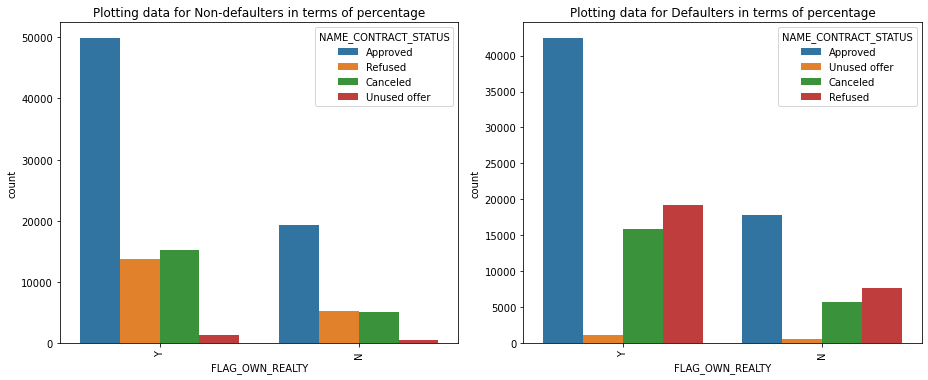

In [279]:
plotting('FLAG_OWN_REALTY','NAME_CONTRACT_STATUS')

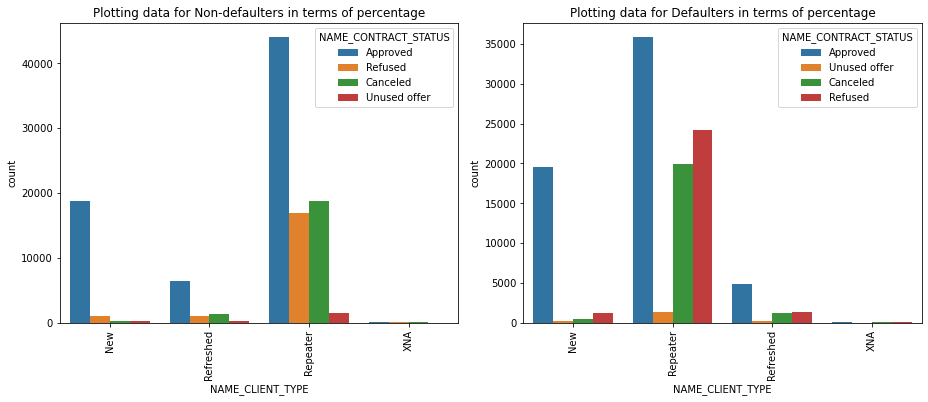

In [280]:
plotting('NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS')

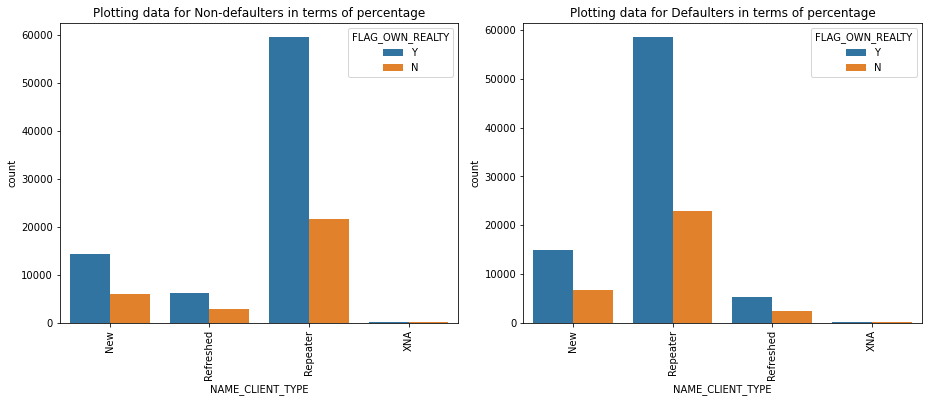

In [281]:
plotting('NAME_CLIENT_TYPE','FLAG_OWN_REALTY')

 - **Inferences.**
      - From the above three graphs we can say that people who own the property and have repeated for loan are refused more than that of others.
      - We have to make sure that people applying for a loan should not have any running loan.

In [282]:
df_0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'CNT_PAYMENT'],
      dtype='object')

In [283]:
df_0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      33360
Family             14280
Spouse, partner     4395
Children            2206
Other_B             1215
Other_A              611
Group of people      130
Name: NAME_TYPE_SUITE, dtype: int64

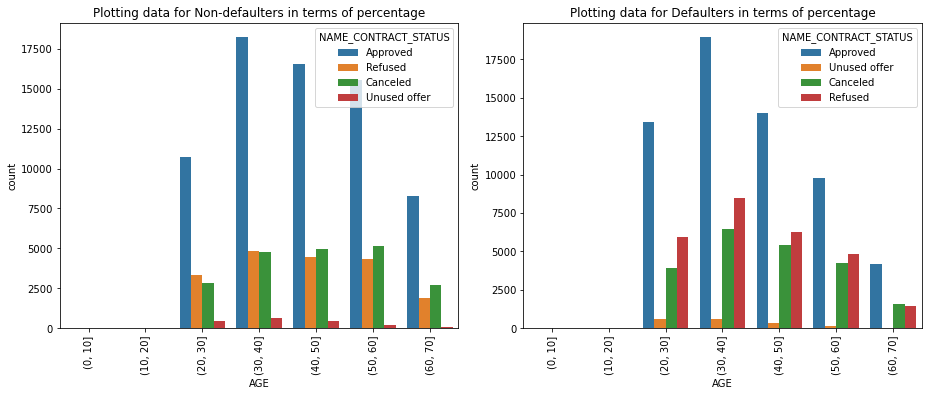

In [284]:
plotting('AGE','NAME_CONTRACT_STATUS')

 - **Inferences.**
      - We can see that based on previous data people from 20-30 and 30-40 age group have high refusal rate in defaulters.

In [285]:
def p75(x):
    return np.quantile(x, 0.75)

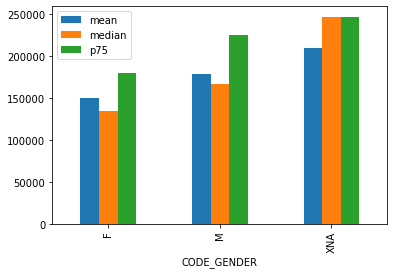

In [286]:
df_0.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].aggregate(['mean','median',p75]).plot.bar()

In [287]:
df_0.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].aggregate(['mean','median',p75])

,mean,median,p75
CODE_GENDER,,,
F,150071.750477,135000.0,180000.0
M,179276.770517,166500.0,225000.0
XNA,210000.000000,247500.0,247500.0


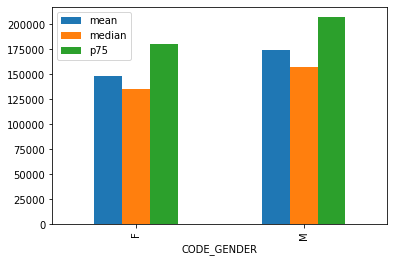

In [288]:
df_1.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].aggregate(['mean','median',p75]).plot.bar()
plt.show()

In [289]:
df_1.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].aggregate(['mean','median',p75])

,mean,median,p75
CODE_GENDER,,,
F,148505.065830,135000.0,180000.0
M,173766.500753,157500.0,207000.0


 - **Inferences**
     - It looks like income of male and female in both defaulters and non-defaulters does not have any impact on defaulting rate.

In [290]:
df_0.groupby('AGE')['AMT_INCOME_TOTAL'].aggregate(['mean','median',p75])

,mean,median,p75
AGE,,,
"(0, 10]",NaN,NaN,NaN
"(10, 20]",NaN,NaN,NaN
"(20, 30]",157462.875802,144000.0,189000.0
"(30, 40]",166604.129896,157500.0,202500.0
"(40, 50]",166798.206164,157500.0,202500.0
"(50, 60]",154517.617648,135000.0,189000.0
"(60, 70]",139059.803795,130500.0,180000.0


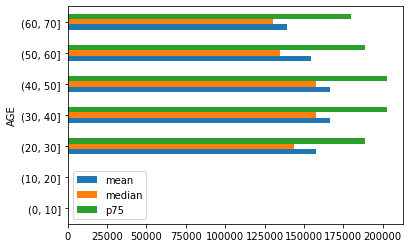

In [291]:
df_0.groupby('AGE')['AMT_INCOME_TOTAL'].aggregate(['mean','median',p75]).plot.barh()

In [292]:
df_1.groupby('AGE')['AMT_INCOME_TOTAL'].aggregate(['mean','median',p75])

,mean,median,p75
AGE,,,
"(0, 10]",NaN,NaN,NaN
"(10, 20]",NaN,NaN,NaN
"(20, 30]",150179.330578,135000.0,180000.0
"(30, 40]",160770.041276,157500.0,202500.0
"(40, 50]",167366.609116,157500.0,202500.0
"(50, 60]",160937.543241,153000.0,202500.0
"(60, 70]",139545.218845,130500.0,175500.0


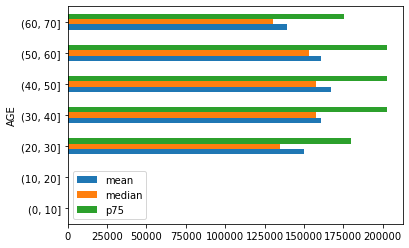

In [293]:
df_1.groupby('AGE')['AMT_INCOME_TOTAL'].aggregate(['mean','median',p75]).plot.barh()
plt.show()

 - **Inferences.**
     - If we look at the average income of the people from 20-30 and 30-40 years age group of defaulters, it is quiet less than that of non-defaulters.
     - This means income of people from 20 to 40 age group have impact on the default rate.

-------------------------------------------------------------------------------------------------------------------------------

## Multivariate analysis

-------------------------------------------------------------------------------------------------------------------------------

In [294]:
df_0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', 'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'CNT_PAYMENT'],
      dtype='object')

#### Gender Vs. Age. Vs. Salary

In [295]:
pivot_0 = pd.pivot_table(data=df_0,index='CODE_GENDER',columns='AGE',values='AMT_INCOME_TOTAL')
pivot_0

AGE,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
CODE_GENDER,,,,,
F,143158.042838,154569.639968,157194.593529,149671.489863,137680.723075
M,175654.152532,187024.191420,186978.291242,171078.046973,145842.912626
XNA,210000.000000,NaN,NaN,NaN,NaN


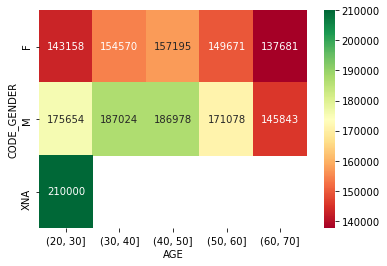

In [296]:
sns.heatmap(pivot_0,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

In [297]:
pivot_1 = pd.pivot_table(data=df_1,index='CODE_GENDER',columns='AGE',values='AMT_INCOME_TOTAL')
pivot_1

AGE,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
CODE_GENDER,,,,,
F,136879.034978,148408.924685,157610.928910,153538.416006,138058.209643
M,164825.914124,177005.860498,182444.608849,175164.792976,145024.534951


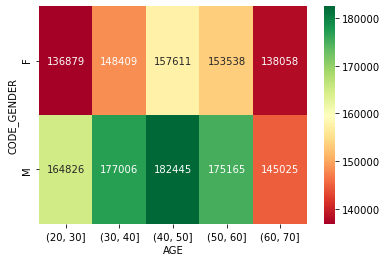

In [298]:
sns.heatmap(pivot_1,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

 - **Inferences.**
     - Females from age group 20-30 are the top most defaulters.

In [299]:
pivot_0 = pd.pivot_table(data=df_0,index='NAME_EDUCATION_TYPE',columns='AGE',values='AMT_INCOME_TOTAL')
pivot_0

AGE,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
NAME_EDUCATION_TYPE,,,,,
Academic degree,199500.000000,203400.000000,227700.000000,197030.769231,226800.000000
Higher education,171651.966755,188459.080482,193925.140051,186299.081134,165461.737665
Incomplete higher,164231.034718,181673.780488,187872.175732,169419.144981,152369.113139
Lower secondary,149517.391304,147062.320917,143939.018692,120207.070234,112759.782609
Secondary / secondary special,149697.576397,157954.109707,159921.570626,148888.608657,134665.161684


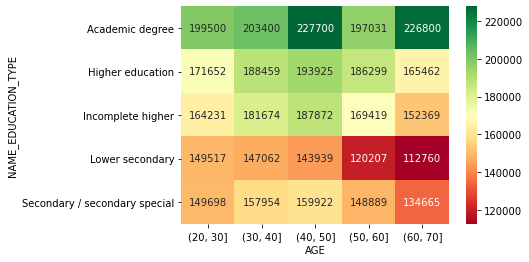

In [300]:
sns.heatmap(pivot_0,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

 - **Inferences.**
     - As we can clearly see that people from age group 40-50 and age group 60-70 with academic degree are the people who pays their loan on time. i.e they are highest non-defaulters.

#### Education Vs. Age Vs. Salary

In [301]:
pivot_1 = pd.pivot_table(data=df_1,index='NAME_EDUCATION_TYPE',columns='AGE',values='AMT_INCOME_TOTAL')
pivot_1

AGE,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
NAME_EDUCATION_TYPE,,,,,
Academic degree,NaN,360000.000000,NaN,NaN,NaN
Higher education,168851.040000,184244.532375,198297.289157,187485.059524,171234.782609
Incomplete higher,159294.793839,174261.718750,164558.205689,166134.857143,109983.050847
Lower secondary,122966.903915,139811.208267,129010.714286,138676.392573,110352.024291
Secondary / secondary special,145047.713958,156553.793980,162936.812383,157688.373231,136185.353293


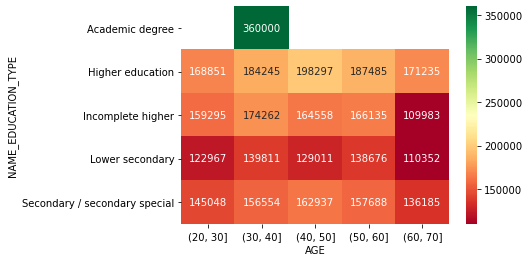

In [302]:
sns.heatmap(pivot_1,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

 - **Inferences.**
     - As we can see that people from age group of 60-70 and with Lower Secondary and Incomplete higher education are the top defaulters.
     - People with lower secondary education and from the age group 20-30 are the second top most defaulters.

In [303]:
pivot_0 = pd.pivot_table(data=df_0,index='CODE_GENDER',columns='NAME_EDUCATION_TYPE',values='AMT_INCOME_TOTAL')
pivot_0

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
CODE_GENDER,,,,,
F,205293.103448,173713.260211,158872.352697,120436.368996,143379.165590
M,220950.000000,206188.599357,194060.318384,150734.638554,171525.106329
XNA,NaN,135000.000000,247500.000000,NaN,NaN


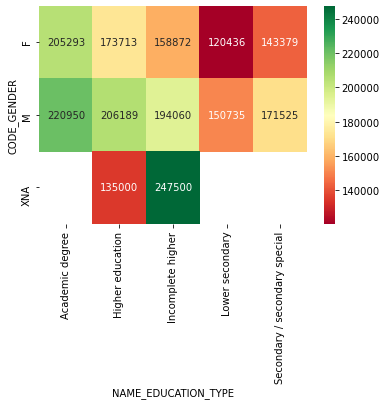

In [304]:
sns.heatmap(pivot_0,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

In [305]:
pivot_1 = pd.pivot_table(data=df_1,index='CODE_GENDER',columns='NAME_EDUCATION_TYPE',values='AMT_INCOME_TOTAL')
pivot_1

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
CODE_GENDER,,,,,
F,360000.0,171605.601662,146794.168527,121276.503341,144716.806189
M,NaN,201695.430877,190329.240163,141483.445946,169322.380051


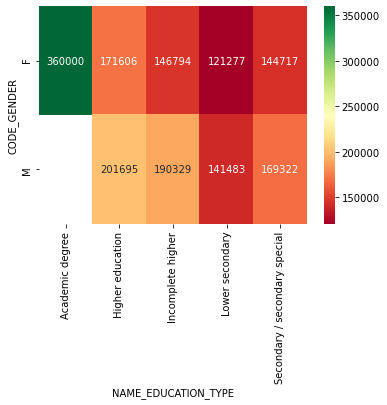

In [306]:
sns.heatmap(pivot_1,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

 - **Inference.**
     - As we can clearly see, females with lower secondary education are the top defaulters follower by males with lower secondary education.
     - We can also see that as the qualification level increases, the salary increases and the default rate decreases.
     - This means Education plays an important role in our analysis.

#### Age Vs. Income type Vs. Salary

In [307]:
pivot_0 = pd.pivot_table(data=df_0,index='AGE',columns='NAME_INCOME_TYPE',values='AMT_INCOME_TOTAL')
pivot_0

NAME_INCOME_TYPE,Commercial associate,Pensioner,State servant,Student,Unemployed,Working
AGE,,,,,,
"(20, 30]",170583.802877,126758.250000,164701.758251,NaN,NaN,151019.786590
"(30, 40]",184112.005925,144597.413793,168779.316149,NaN,NaN,159390.666928
"(40, 50]",186695.289906,156621.010345,165889.585775,NaN,36000.0,159107.999277
"(50, 60]",183680.281454,138834.484980,168462.735060,168750.0,26550.0,158837.635487
"(60, 70]",180051.428571,133363.099346,192198.068182,NaN,NaN,162360.899167


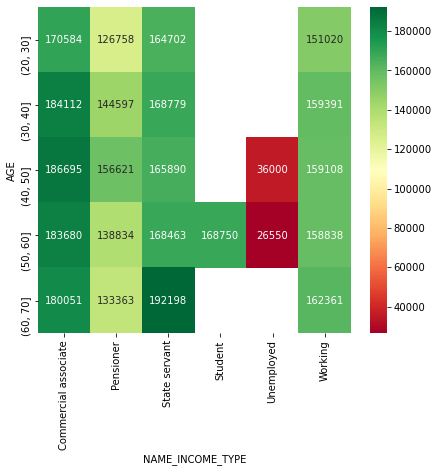

In [308]:
plt.figure(figsize=(7,6))
sns.heatmap(pivot_0,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

In [309]:
pivot_1 = pd.pivot_table(data=df_1,index='AGE',columns='NAME_INCOME_TYPE',values='AMT_INCOME_TOTAL')
pivot_1

NAME_INCOME_TYPE,Commercial associate,Pensioner,State servant,Unemployed,Working
AGE,,,,,
"(20, 30]",160501.364102,140240.131579,155750.348780,45000.000000,146489.949932
"(30, 40]",175399.571260,157012.886598,155687.486369,44590.909091,156801.792384
"(40, 50]",189638.866700,166688.566131,168686.474501,135000.000000,159824.714893
"(50, 60]",188984.708152,143094.059190,160392.774194,NaN,165718.798703
"(60, 70]",190342.274678,135867.849516,178134.146341,74647.058824,158866.200000


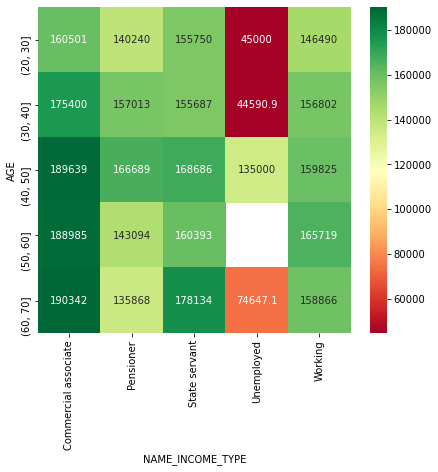

In [310]:
plt.figure(figsize=(7,6))
sns.heatmap(pivot_1,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

 - **Inferences.**
     - We can clearly see that people who are unemployed and from age group 20-30, 30-40 are the top defaulters.
     - People from age group 60-70 and working as State servent are the highest non-defaulters.

#### Age Vs. Family Status Vs. Salary

In [311]:
pivot_0 = pd.pivot_table(data=df_0,index='AGE',columns='NAME_FAMILY_STATUS',values='AMT_INCOME_TOTAL')
pivot_0

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
AGE,,,,,
"(20, 30]",157678.820135,156396.957887,159040.936475,159552.603923,142966.216216
"(30, 40]",164369.961818,166014.871224,174313.374654,168398.942631,163213.493724
"(40, 50]",170225.623100,165568.078332,167177.552486,172237.029178,161123.944530
"(50, 60]",159344.622042,153729.618936,159475.912004,157835.823359,148662.796774
"(60, 70]",150993.995140,139049.841478,142323.312357,137663.184783,135623.493283


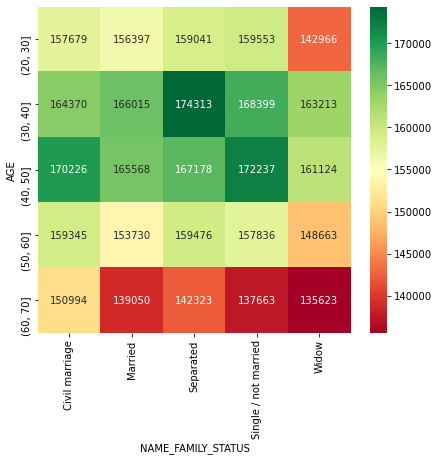

In [312]:
plt.figure(figsize=(7,6))
sns.heatmap(pivot_0,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

 - **Inferences.**
      - The people from age group 30-40 and with Separated family status are the top most non-defaulters.
      - The Single and Civil married people from age group 40,50 age group are the second most non-defaulters.

In [313]:
pivot_1 = pd.pivot_table(data=df_1,index='AGE',columns='NAME_FAMILY_STATUS',values='AMT_INCOME_TOTAL')
pivot_1

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
AGE,,,,,
"(20, 30]",150703.768103,149492.785206,155432.432432,150514.033491,199086.206897
"(30, 40]",159288.241183,160041.227363,165287.867647,164254.779027,152293.388430
"(40, 50]",171992.452578,164528.152013,174813.323157,172015.515610,162586.157337
"(50, 60]",165618.585441,160584.590835,163938.645805,159237.852240,157880.836649
"(60, 70]",160450.434783,140542.988549,135805.307263,137781.392252,133582.706024


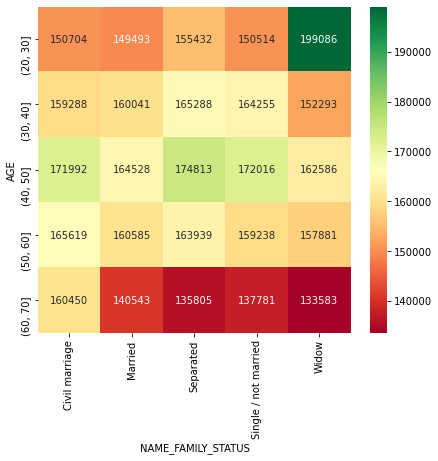

In [314]:
plt.figure(figsize=(7,6))
sns.heatmap(pivot_1,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

 - **Inferences.**
     - Seems like people from age group 60-70 are the top most defaulters in all the categories of family status except for Civil married category.

#### Age Vs. Occupation Vs. Salary

In [315]:
pivot_0 = pd.pivot_table(data=df_0,index='AGE',columns='OCCUPATION_TYPE',values='AMT_INCOME_TOTAL')
pivot_0

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Other,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
AGE,,,,,,,,,,,,,,,,,,,
"(20, 30]",162200.603011,118204.687500,150589.483914,154795.983579,167853.005566,180683.560976,163989.371375,144337.500000,156405.049908,131628.409091,197886.782990,137923.977778,161054.363761,163554.775281,167580.000000,146281.855548,144514.830508,149237.632979,141046.875000
"(30, 40]",175565.451082,128928.857143,139330.851064,162332.114731,183296.671340,171409.090909,174023.897034,181345.108696,164419.163139,140767.405063,213685.612230,143251.848947,168292.784460,166704.000000,192144.578313,150782.364674,143801.886792,152769.272727,157338.129496
"(40, 50]",183111.073620,134102.889246,138915.780738,164044.463602,188384.870935,215558.823529,173167.379167,164700.000000,162781.997873,134547.761194,211372.651577,151974.970009,162475.822222,184136.842105,212691.176471,153586.076935,161139.130435,160043.755414,143812.135922
"(50, 60]",187038.037267,142347.902098,142835.739796,165515.586735,180255.161318,165659.727273,175804.344340,152250.000000,161309.996122,142926.605505,213183.177132,156758.663551,143241.327126,176788.421053,195692.307692,158797.944841,157398.387097,147807.692308,167652.825000
"(60, 70]",189625.000000,146565.254237,154298.863636,193355.196429,186952.941176,159187.500000,209014.285714,NaN,169576.863322,111000.000000,210651.342282,179728.301887,134234.251904,127285.714286,180000.000000,168909.448819,163800.000000,132766.791045,205200.000000


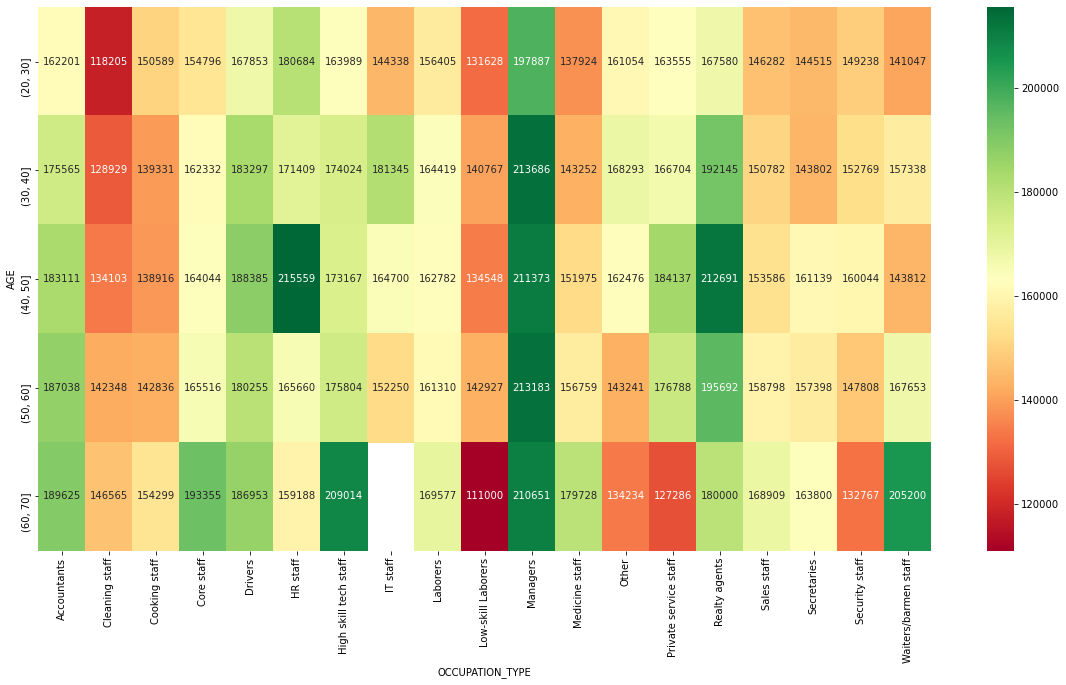

In [316]:
plt.figure(figsize=(20,10))
sns.heatmap(pivot_0,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

- **Inferences.**
    - Looks like HR staff from age group 40-50 are the top most non-defaulters followed by managers from age group of 50-60. 

In [317]:
pivot_1 = pd.pivot_table(data=df_1,index='AGE',columns='OCCUPATION_TYPE',values='AMT_INCOME_TOTAL')
pivot_1

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Other,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
AGE,,,,,,,,,,,,,,,,,,,
"(20, 30]",164649.428571,111585.810811,121018.273381,150925.285059,169825.232114,157184.210526,153614.053050,189000.000000,152916.239157,127320.560748,185097.739782,123663.733467,152514.062467,152609.826590,165531.645570,140825.579377,127905.405405,137648.734177,137108.856089
"(30, 40]",172474.137931,125077.229846,137830.291971,157392.399497,184499.421222,169905.405405,158741.542056,164482.758621,162668.588407,140248.686515,202202.677743,135088.524590,155851.256732,153843.750000,193244.680851,151197.573463,119798.076923,149931.105207,169665.829146
"(40, 50]",185950.455581,137913.578680,141799.938348,154897.952586,182643.572680,190000.000000,163494.444444,169297.297297,165665.386395,138258.387097,226143.483632,151883.097056,162714.543664,182421.238938,182803.278689,162299.367279,226289.062500,148472.227580,196120.353982
"(50, 60]",175371.234940,139770.814480,167370.967742,169752.788136,180627.450980,184736.842105,169542.086331,NaN,174995.044195,167711.721854,219336.305389,146090.651558,147893.820542,194666.666667,327115.384615,158951.200000,230192.307692,146629.354839,166304.347826
"(60, 70]",279450.000000,127620.000000,174705.882353,190392.857143,153658.536585,NaN,187815.789474,NaN,149847.133758,NaN,244253.164557,118500.000000,136331.269190,NaN,NaN,161312.500000,NaN,151650.000000,NaN


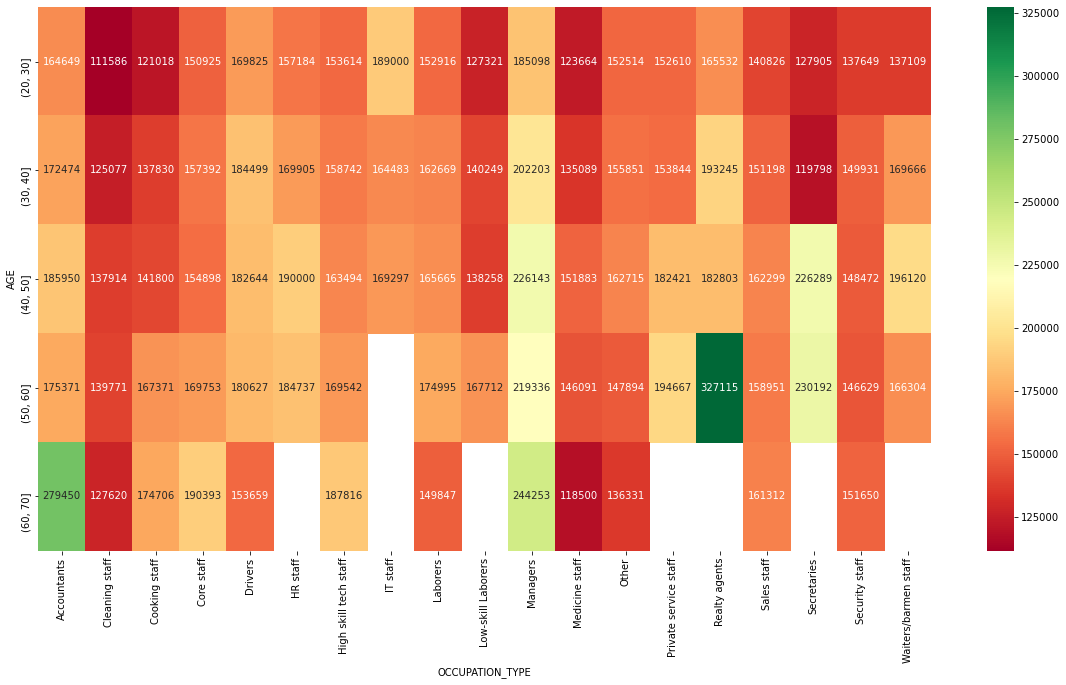

In [318]:
plt.figure(figsize=(20,10))
sns.heatmap(pivot_1,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

 - **Inferences.**
     - Cleaning staff from age group of 20-30 and medical staff from age grop of 60-70 are the top most non-defaulters.
     - Also secretaries from age group 30-40 are the second top most defaulters.

In [319]:
pivot_1 = pd.pivot_table(data=df_1,index='AGE',columns='CNT_CHILDREN',values='AMT_INCOME_TOTAL')
pivot_1

CNT_CHILDREN,0,1,2,3,4,5
AGE,,,,,,
"(20, 30]",152984.602962,145686.951104,146586.839899,146138.613861,129600.000000,99750.0
"(30, 40]",162592.484532,161578.242808,156828.552632,148329.668675,147000.000000,190000.0
"(40, 50]",166958.030963,166208.033789,178619.815385,160639.436620,122600.892857,67500.0
"(50, 60]",160704.956776,159435.957447,191235.197368,298500.000000,199125.000000,81000.0
"(60, 70]",139759.385972,133291.139241,74812.500000,NaN,NaN,NaN


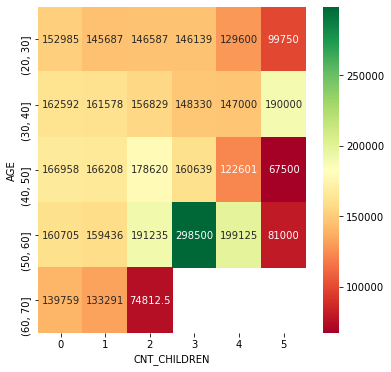

In [320]:
plt.figure(figsize=(6,6))
sns.heatmap(pivot_1,cmap='RdYlGn',annot=True,fmt='g')
plt.show()

 - **Inferences.**
     -  As we can see that people with 5 childrens and of age 40-50 tends to default more than others.

-------------------------------------------------------------------------------------------------------------------------------

 ## Top Inferences
 

-------------------------------------------------------------------------------------------------------------------------------

 - We can say that Education, Age, Occupation and salary have great impact on the defaulting / non-defaulting rate of a customer.

 - From our EDA we understood that people between the age of 20-40 and with secondary/lower secondary education have the most default rate. So we should keep this in mind while taking decision to approve or reject the loan.

 - We also saw that occupation of the customer affects the defaulting rate. People with laborer and driver occupation have highest default rate. So we should avoid giving loans to these people to avoid any further losses.

 - People with Academic degree from all the age groups are the safest customers so we should not reject their applications.

 ## Thank You.